In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [22]:
data=1000
batch=100
set=10
layer=10
n_ini=1.0
n_fin=0.05
dn=-0.1
m2=-1
lam=1
c_reg1=0.03
c_reg2=0.0001

In [25]:
dn=[]
for i in range (layer):
    if i<5: dn_in=-0.15
    else: dn_in=-0.05
    dn.append(dn_in)
print(dn)

[-0.15, -0.15, -0.15, -0.15, -0.15, -0.05, -0.05, -0.05, -0.05, -0.05]


# Generate metric

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([ 1.56113867,  1.5757164 ,  1.38494853,  2.02835928,  3.03096964,
        3.4226237 ,  3.87935925,  6.52753158,  9.25294304, 21.09365966])>
tf.Tensor(
[ 3.01490951  3.03680456  3.09134316  3.22977376  3.59861219  4.72330177
  5.58607614  7.11070704 10.29821491 20.14977407], shape=(10,), dtype=float64)


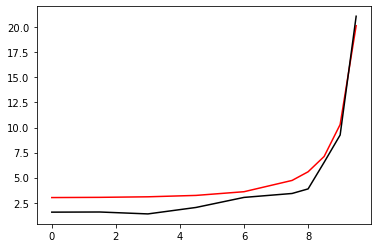

In [29]:
h=tf.zeros(layer)
h_in=[]
mu_in=1.0
for i in range (layer):
    mu=1/(mu_in)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
    mu_in=mu_in+dn[i]
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
mid_in=1.0
for i in range (layer):
    midd=3*coth(3*(mid_in)).numpy()
    middd.append(midd)
    mid_in=mid_in+dn[i]
h_real=tf.constant(middd)
print(h_real)
x=[0, 1.5, 3, 4.5, 6, 7.5, 8, 8.5, 9, 9.5]
plt.plot(x, h_real, 'r-')
plt.plot(x, h.numpy(), 'k-')
plt.show()

In [6]:
def F_func(a,b):
    return 2*b/n_fin-m2*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

# Neural Network

In [7]:
def LP2(hh, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn[j]*pi
        pi1 =phi*m2*dn[j]+(1-dn[j]*hh[j])*pi+dn[j]*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh):
    Positive=[]
    while len(Positive)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        F=np.array(tf.math.abs(F_func(phi_1, pi_1)))
        for i in range (len(phi1[F<n_fin])):
            Positive.append([phi1[F<n_fin][i], pi1[F<n_fin][i]])
            if len(Positive)>=batch: break
    return Positive
def NN_func_n(hh):
    Negative=[]
    while len(Negative)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        F=np.array(tf.math.abs(F_func(phi_1, pi_1)))
        for i in range (len(phi1[F>=n_fin])):
            Negative.append([phi1[F>=n_fin][i], pi1[F>=n_fin][i]])
            if len(Negative)>=batch: break
    return Negative
def NN_func_01(hh, list1):
    PP=[]
    NN=[]
    phi=np.array(list1)[:, 0]
    pi=np.array(list1)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, phi, pi)[1]))
    for i in range (len(phi[F<n_fin])):
        PP.append([phi[F<n_fin][i], pi[F<n_fin][i]])
    for i in range (len(phi[F>=n_fin])):
        NN.append([phi[F>=n_fin][i], pi[F>=n_fin][i]])
    return PP, NN

# Data generation

In [8]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(h_real))
    Negative.insert(i, NN_func_n(h_real))

In [19]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, Negative[i])[1])

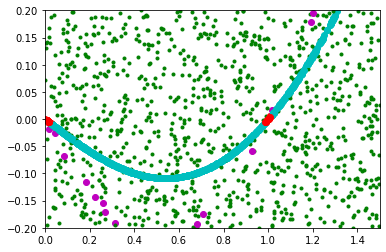

In [20]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [11]:
def Error_func(hh, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, phi0, pi0)
    phi_1, pi_1=LP2(hh, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn[k])**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_p+sum_n+E_reg1+E_reg2

In [ ]:
for i in range (set):
    print(Error_func(h_real, Positive[i], Negative[i]))
for i in range (set):
    print(Error_func(h, Positive[i], Negative[i]))

# Optimizer

c_reg1=0.06

0 1.270097924171118
[ 3.82992711  3.1235323   1.15431214  2.72424412  3.49959996  3.48236805
  4.78427392  7.39418129  9.8005903  20.17954713]


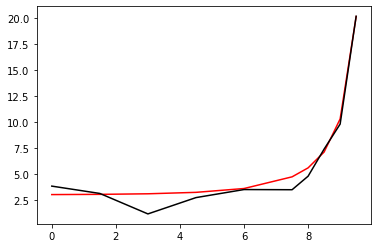

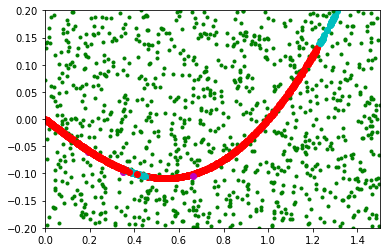

1000 0.11880396303026831
[ 3.00715882  2.95687721  2.89652491  2.9611003   3.71691237  9.02321083
  9.53134622 10.22485131 11.12421164 12.19126695]


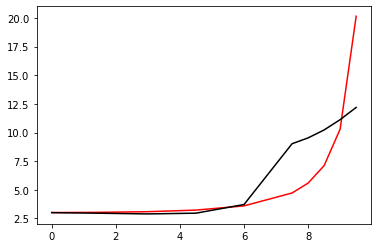

2000 0.08071704655540708
[2.94227173 2.97432192 3.07705131 3.3417711  4.04907217 6.35726208
 6.53258316 6.68872423 6.89043718 7.02954087]


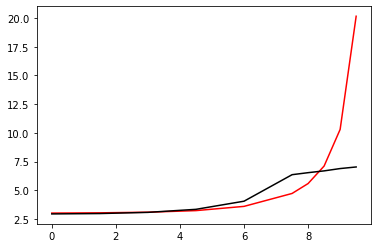

3000 0.07681191620658032
[2.94792107 2.97093211 3.04232943 3.22431458 3.70272577 5.26514246
 5.37486108 5.53539132 5.64345995 5.89571733]


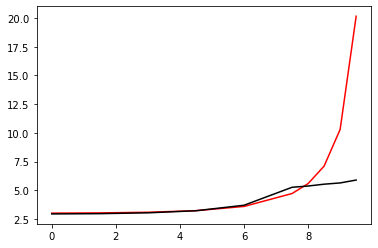

4000 0.09734624764786828
[2.89681145 2.94479592 3.03711123 3.21026335 3.57991483 4.77052876
 5.00992805 4.97753916 5.28700847 5.27315361]


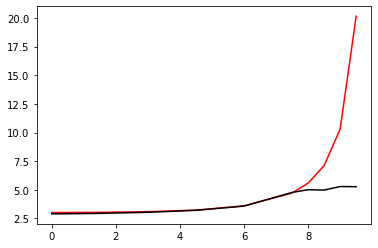

5000 0.08343872878317612
[2.99252571 3.04194425 3.12982493 3.28773351 3.61672897 4.45947994
 4.63385637 4.70816794 4.83468104 5.05201468]


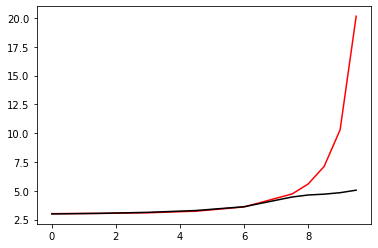

6000 0.07928421967134883
[2.93917329 2.94802898 2.99506405 3.12710439 3.48379766 4.60440314
 4.69653113 4.81404852 4.99160843 5.11543418]


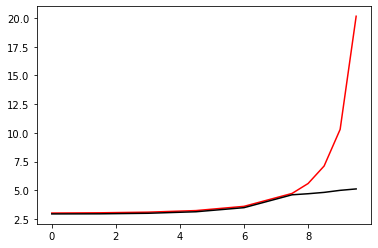

7000 0.07623179989092803
[2.9902674  2.98326615 2.99796762 3.08418419 3.35642919 4.20023887
 4.2692264  4.36123447 4.49179333 4.68096244]


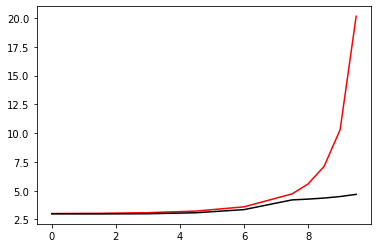

8000 0.0764413042217412
[2.9984844  2.99015827 3.00109691 3.08279879 3.35054119 4.20884387
 4.28317991 4.3851162  4.5251525  4.70831173]


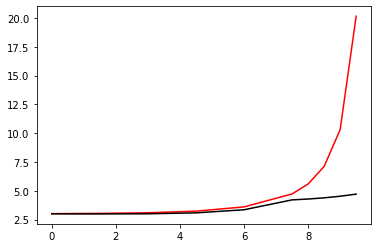

9000 0.07633037590878411
[2.97028223 2.98537554 3.03561588 3.16286796 3.48217961 4.38661128
 4.46858137 4.57534341 4.72156142 4.88907983]


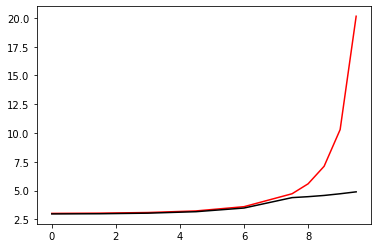

10000 0.0765243839481263
[2.95618534 2.96557342 3.01097146 3.13598837 3.47932401 4.52670629
 4.72312034 4.72288393 4.98725831 5.04025951]


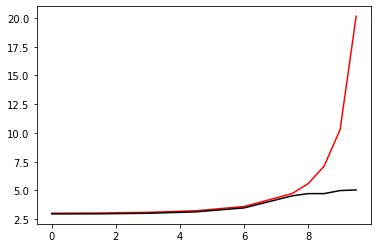

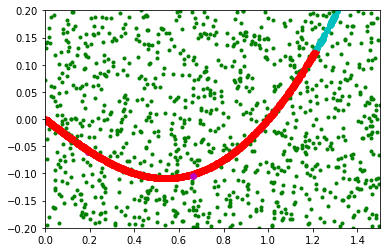

11000 0.08722339006036842
[2.93192674 2.94577229 2.99218889 3.11223714 3.43808715 4.49995654
 4.62640464 4.70024867 4.90936894 4.99366548]


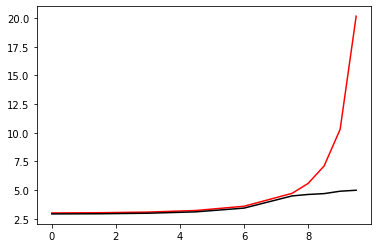

12000 0.07957414814970705
[2.97861506 3.01435049 3.09447031 3.23606824 3.51042437 4.28855017
 4.39522617 4.45889903 4.62523766 4.73754342]


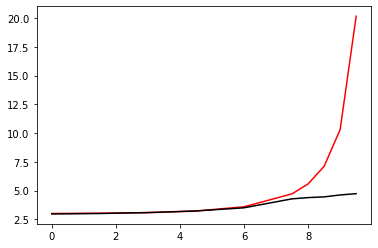

13000 0.07648488830553402
[2.96434029 2.97392513 3.00824172 3.10877637 3.41102941 4.45948708
 4.64976252 4.63570505 4.90264823 4.95934611]


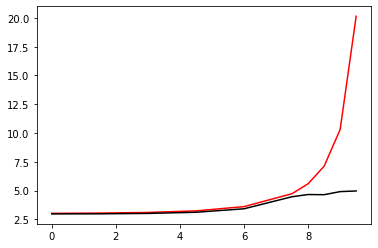

14000 0.07741334820955159
[3.01122753 3.00852583 3.02225298 3.08725495 3.30970885 4.24930336
 4.37512235 4.45445007 4.58006342 4.94213242]


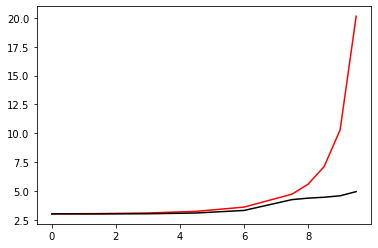

15000 0.16101073365924354
[2.84300806 2.8667742  2.91628869 3.02638904 3.31478568 4.30809655
 4.43827595 4.61493106 4.65445819 5.13485421]


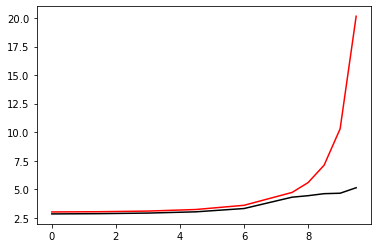

16000 0.5833525014501205
[2.71136339 2.74055528 2.80204729 2.94090181 3.2873716  4.41402224
 4.59924393 4.64068976 4.7965979  5.19411719]


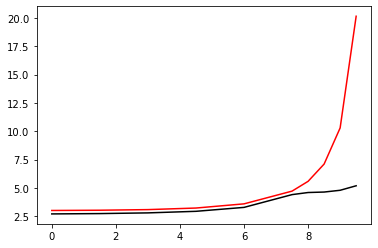

17000 0.08267958234751986
[2.93547571 2.94882444 2.99424968 3.1136902  3.44032299 4.51194419
 4.61950005 4.71639253 4.90226229 5.0117314 ]


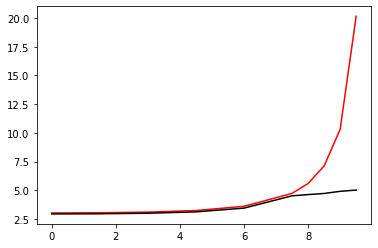

18000 0.07592068895943851
[2.9645527  2.97712191 3.0137643  3.11163911 3.39521415 4.40644694
 4.55035831 4.65102476 4.75428427 5.01781221]


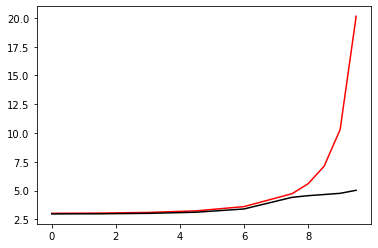

19000 0.07602865612201623
[2.94643725 2.97053628 3.03736702 3.17936125 3.5004573  4.45145763
 4.5311912  4.63662166 4.79766704 4.9278042 ]


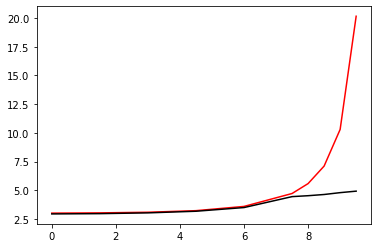

20000 0.08547386602437153
[3.04042655 3.08333035 3.16602434 3.31221271 3.61261403 4.41160685
 4.50662998 4.58071093 4.69375613 4.91922132]


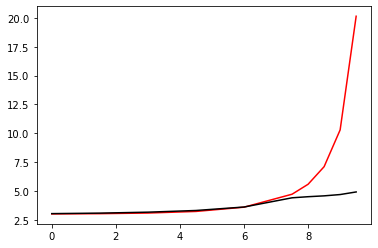

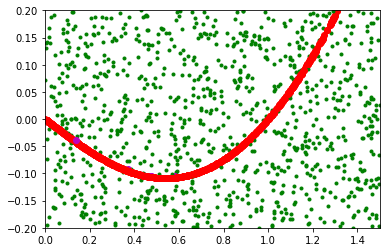

21000 0.07663539411332118
[3.00440948 3.00260962 3.01606097 3.08509798 3.33390671 4.32125874
 4.42475079 4.53770111 4.66945747 4.86615191]


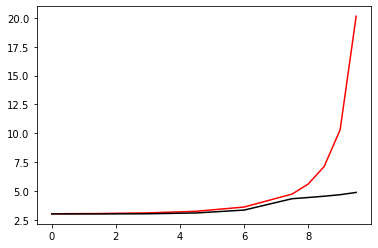

22000 0.07639687056756649
[2.9521713  2.96778822 3.02036814 3.15526358 3.50891373 4.5755633
 4.75204968 4.76996092 5.02107874 5.07777859]


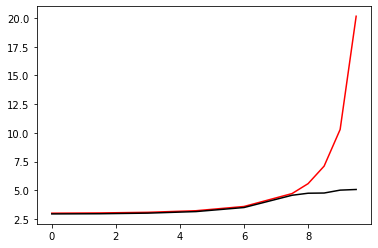

23000 0.07683400659124759
[2.94103577 2.95948819 3.01654236 3.15479064 3.49976301 4.53183918
 4.7166039  4.72183957 4.96865037 5.04002878]


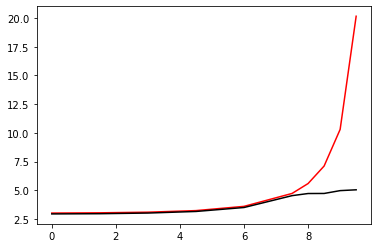

24000 0.083242415531576
[2.93984813 2.94514616 2.98516772 3.1046909  3.44059829 4.49891921
 4.62171557 4.70130981 4.89926239 5.00202284]


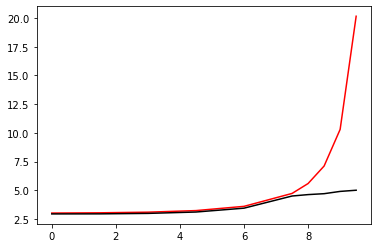

25000 0.07627275611617504
[2.9489789  2.97443025 3.04129185 3.17916387 3.4934431  4.43224046
 4.56849865 4.61050875 4.82764355 4.91813674]


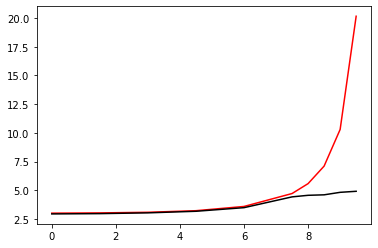

26000 0.0772133777092308
[2.94895052 2.95513171 2.99297421 3.10480917 3.42189767 4.46830662
 4.54738492 4.66948629 4.82806778 4.96742806]


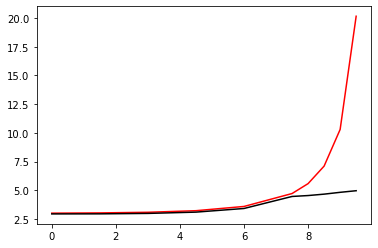

27000 0.13579557872234607
[3.11619014 3.17569915 3.26681268 3.42554275 3.74852265 4.28811096
 4.31270814 4.2706787  4.39581596 4.73536368]


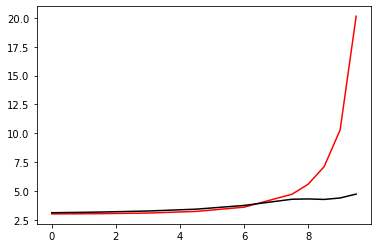

28000 0.07616562477189338
[2.98449448 2.98757922 3.01102586 3.10234414 3.38284013 4.31106965
 4.39322374 4.49933895 4.65625611 4.79682617]


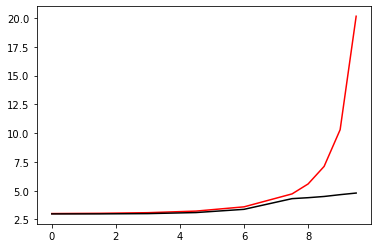

29000 0.07617190793064178
[2.99112251 2.98616404 2.99284795 3.05598119 3.30900402 4.30558229
 4.41642302 4.49177152 4.71654    4.77749226]


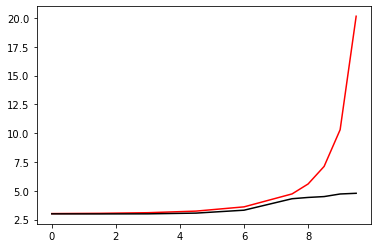

30000 0.07638521843787163
[2.9666724  2.99426297 3.05087728 3.15830929 3.41423564 4.39619568
 4.4649347  4.56891624 4.69429624 4.93149657]


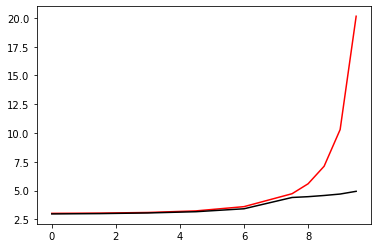

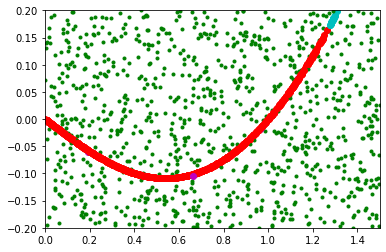

31000 0.08610957294209597
[3.07539186 3.07766103 3.09607967 3.1741435  3.44709666 4.44785006
 4.66517366 4.59423431 4.89784471 4.94526803]


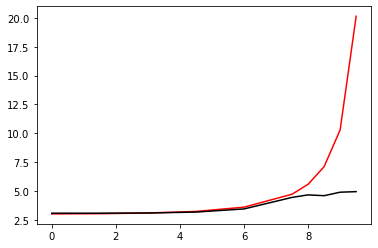

32000 0.08509344469207651
[2.93868197 2.94429774 2.98413514 3.10085453 3.43105973 4.50861573
 4.60872946 4.71306449 4.89273897 5.01248673]


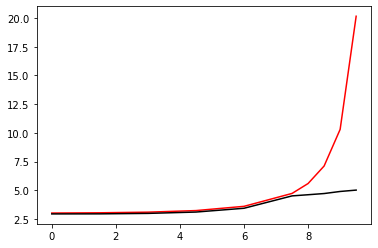

33000 0.07726195088159889
[2.97242093 2.99889362 3.06522978 3.20040829 3.49917391 4.37270314
 4.45921302 4.56392395 4.72474245 4.84528179]


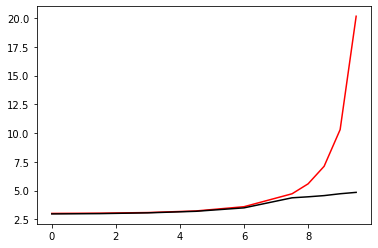

34000 0.11182465006196643
[2.91777738 2.92758427 2.97803473 3.11718928 3.48756581 4.65876805
 4.73803084 4.86980728 5.03417337 5.15301735]


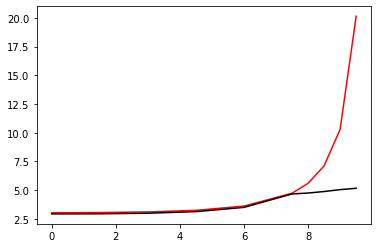

35000 0.4850218523145238
[2.74120892 2.7802965  2.85659724 3.00684925 3.35394555 4.36120211
 4.55834658 4.61906316 4.75353367 5.13885561]


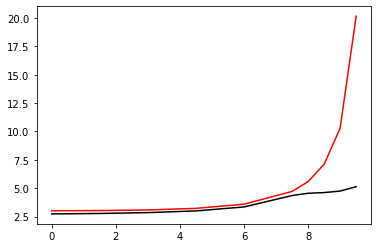

36000 0.07661874352963083
[2.9500894  2.98053605 3.04814371 3.18714337 3.50875524 4.50659127
 4.67477944 4.68270623 4.93527385 4.99058781]


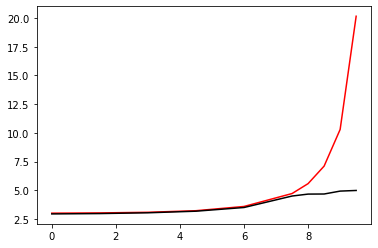

37000 0.08464621345264661
[2.93808127 2.94391534 2.98517703 3.10631131 3.44693126 4.54554465
 4.65714365 4.75116357 4.94481991 5.04817421]


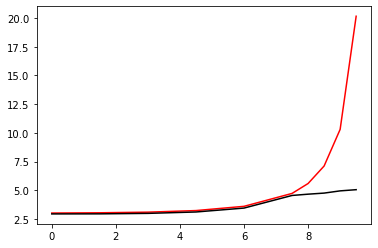

38000 0.07680364878982318
[2.99875553 3.00320767 3.03111673 3.1214512  3.39316423 4.41214546
 4.49500266 4.61401611 4.76672785 4.92453406]


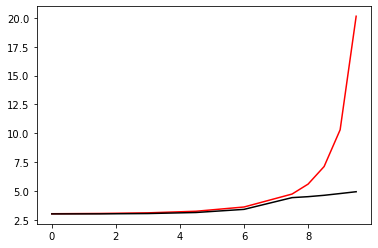

39000 0.07667561785422747
[3.01453273 3.00054273 2.99561011 3.04836494 3.28113688 4.2050809
 4.29002195 4.40864143 4.57058878 4.70695381]


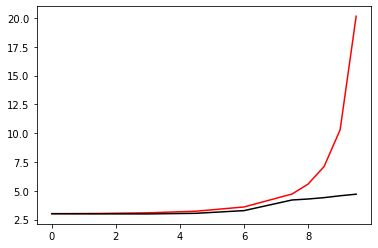

40000 0.07629189043734821
[2.96998374 2.98593006 3.03347392 3.15105434 3.44576609 4.33122168
 4.41056838 4.51279889 4.66193209 4.81125725]


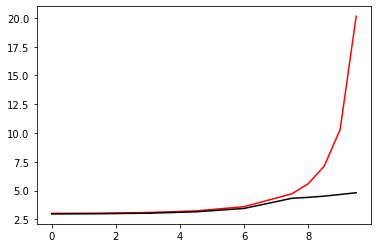

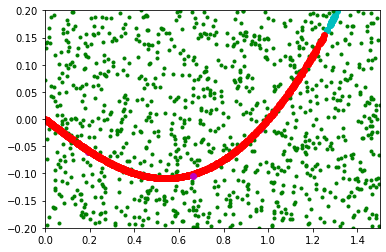

41000 0.08545101511371107
[2.92620173 2.94322009 3.00069208 3.14561446 3.51472107 4.6465101
 4.7486222  4.85630617 5.03997743 5.14596231]


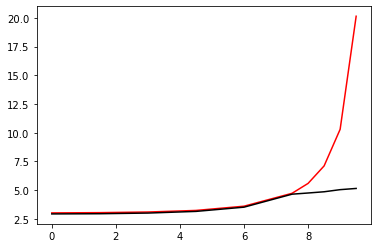

42000 0.08048500882457715
[3.00554132 3.01868457 3.06687217 3.1910565  3.5187271  4.44353083
 4.7001953  4.64102605 4.92033387 4.98305441]


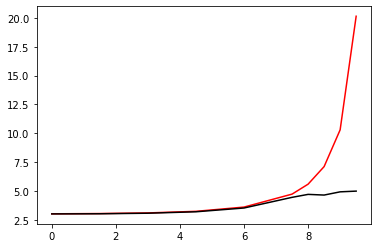

43000 0.0803273260168123
[3.01121202 3.02776263 3.07458182 3.18103445 3.44733425 4.36171087
 4.42888135 4.55886276 4.67944218 4.89199415]


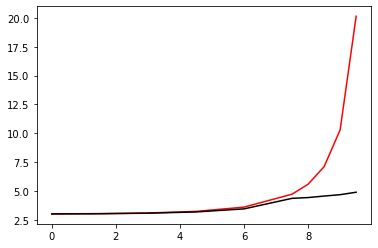

44000 0.07619638415575376
[2.99296919 2.99128213 3.00365372 3.0783655  3.3449282  4.31303381
 4.39996486 4.50617996 4.67205744 4.7963342 ]


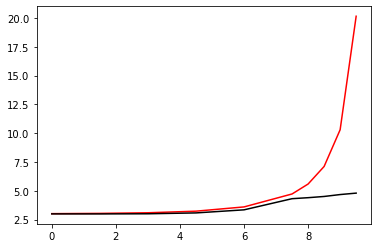

45000 0.07733591824633364
[3.02592758 2.99498617 2.99926403 3.08483513 3.35433399 4.25026261
 4.31954308 4.41216847 4.54960841 4.72935645]


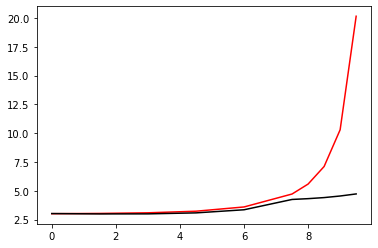

46000 0.07638454851874957
[2.9491274  2.96253383 3.00500561 3.11578929 3.41917518 4.41882023
 4.53344146 4.61295218 4.80254951 4.91431725]


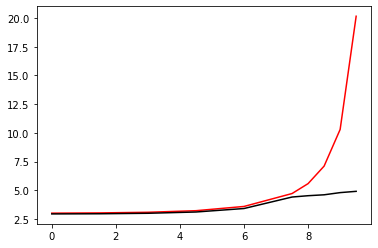

47000 0.0766749387003012
[2.94670909 2.96577116 3.02414382 3.15656815 3.48132869 4.58718017
 4.53799144 4.79334195 4.8383683  5.05701145]


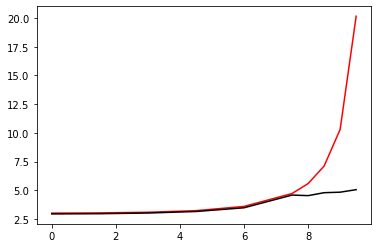

48000 0.07798825681958788
[2.93596439 2.95216715 3.00956174 3.14719316 3.48270038 4.494547
 4.5641029  4.67830087 4.86587116 4.93457314]


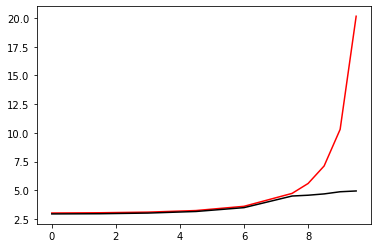

49000 0.08535388493314659
[3.10049642 3.10835133 3.13990745 3.23970618 3.53472377 4.5958413
 4.66747586 4.78565475 4.88652904 5.11583334]


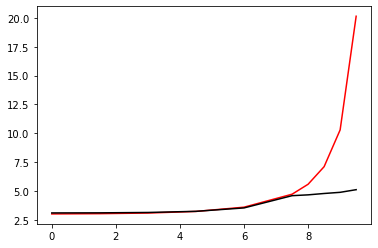

50000 0.07735910243477277
[3.03218453 3.00617865 2.99695886 3.05896239 3.31562039 4.29314108
 4.37503645 4.47404526 4.62194042 4.78467119]


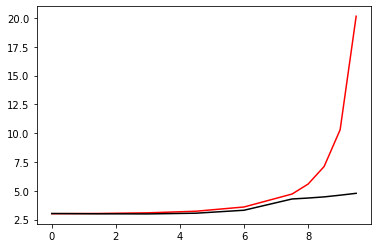

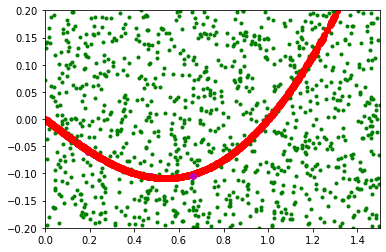

51000 0.0808996534633868
[2.93867631 2.94834652 2.99439161 3.11861844 3.45146027 4.45435862
 4.62302086 4.65193418 4.89236206 4.95538569]


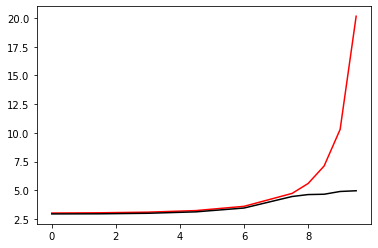

52000 0.08442326524386025
[3.09363546 3.05949697 3.04180531 3.09564688 3.33666984 4.24318024
 4.31503562 4.40829189 4.54045873 4.72540354]


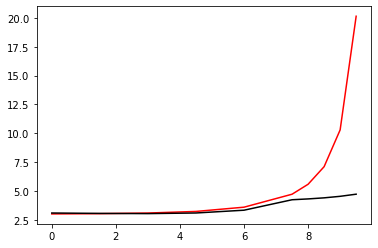

53000 0.0769926479538261
[2.97352655 3.00480982 3.05919376 3.16817227 3.43918631 4.38103056
 4.46232652 4.52820083 4.6889913  4.81667045]


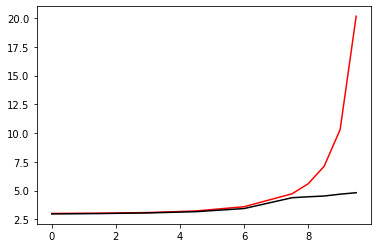

54000 0.07597687164942143
[2.98386014 2.9836615  3.00876309 3.10460949 3.40381398 4.48067423
 4.57273286 4.70566694 4.8453483  5.01768626]


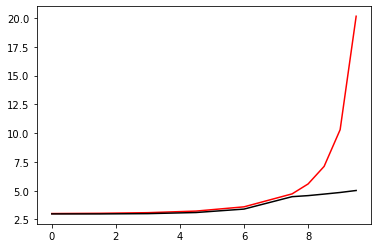

55000 0.08159651699113193
[2.94344558 2.94759097 2.98366048 3.09557591 3.42211566 4.49632631
 4.61125917 4.70242813 4.88572918 5.0108422 ]


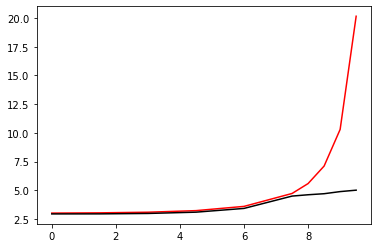

56000 0.5421337426752154
[2.72112853 2.76054295 2.83982365 3.00272606 3.37655134 4.50572602
 4.66872363 4.75523199 4.88864571 5.21912228]


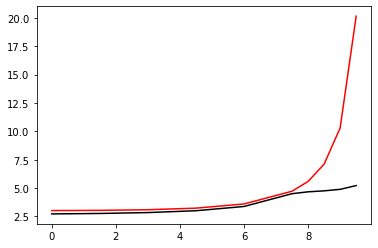

57000 0.07620065869387177
[2.96336177 2.97759404 3.02649734 3.14870452 3.46093812 4.26478226
 4.3312889  4.42939371 4.56990994 4.76326354]


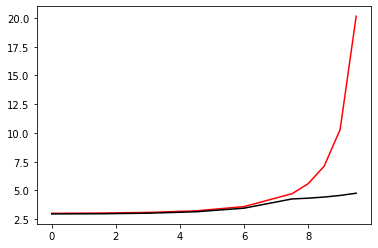

58000 0.08822074943680612
[2.93289874 2.94597343 2.98968871 3.10418317 3.42112822 4.48199946
 4.60247566 4.68396592 4.88489126 4.98051057]


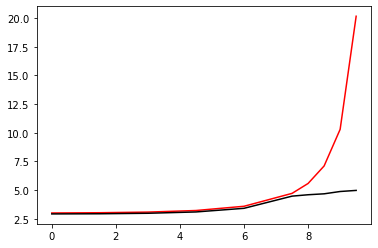

59000 0.08585950358524985
[3.03169808 3.0963803  3.20827226 3.37817257 3.67917029 4.40965782
 4.45542583 4.55470181 4.65814217 4.87115494]


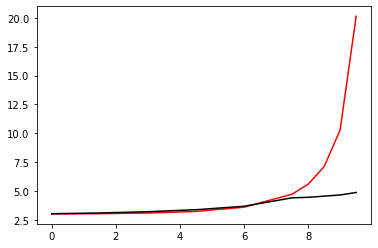

60000 0.07621451338191096
[2.99254436 2.98289881 2.99422884 3.08159819 3.36225888 4.21503037
 4.28745752 4.38514681 4.52274642 4.70887656]


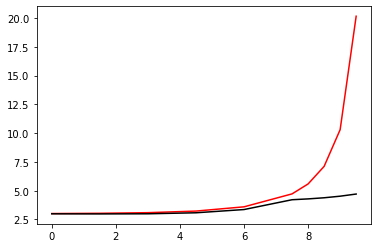

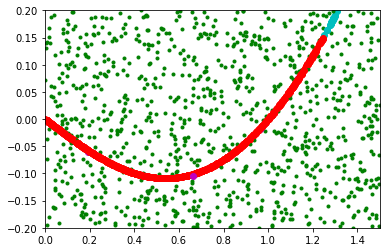

61000 0.08543867772451014
[3.05577953 3.08420299 3.14713452 3.27415815 3.56358738 4.27488156
 4.32822758 4.39888123 4.50788427 4.69566386]


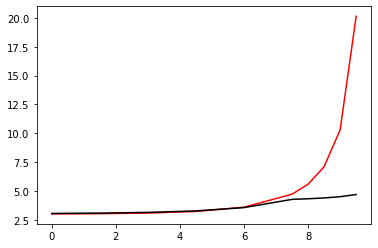

62000 0.198190774911997
[2.7976428  2.83944974 2.91777809 3.07424601 3.43824518 4.33002065
 4.43397956 4.52596569 4.63002453 5.21826084]


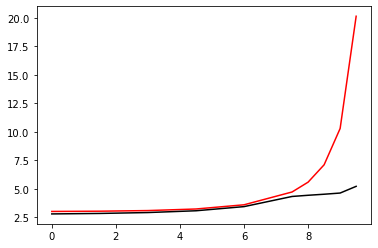

63000 0.08381303575854998
[3.05534109 3.05478195 3.06739961 3.13332425 3.38353518 4.42974019
 4.41147066 4.63976469 4.66660022 4.98508081]


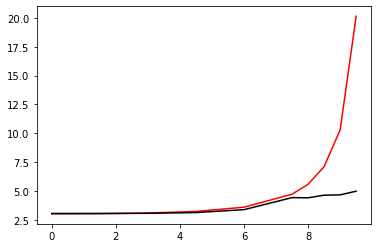

64000 0.07670447014189917
[2.95178004 2.98800133 3.06115464 3.18383178 3.4252993  4.15362413
 4.22687418 4.31990855 4.46019932 4.61209247]


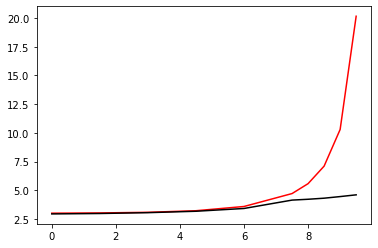

65000 0.08446083172257507
[2.90050446 2.95975783 3.05242135 3.20048841 3.48546539 4.30081222
 4.38271441 4.51914433 4.65317702 4.96235663]


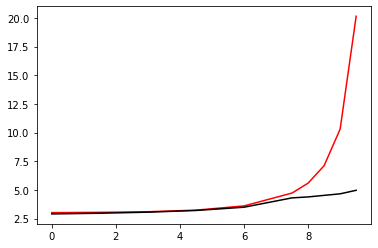

66000 0.07627662565578351
[2.99167712 2.98911009 3.00056128 3.06709522 3.31669977 4.30962725
 4.41132844 4.49323515 4.71947259 4.76940838]


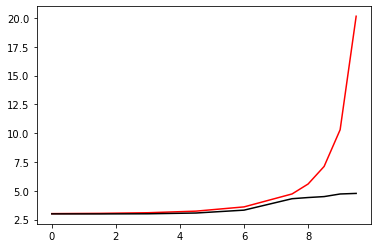

67000 0.07633196412045815
[2.96369327 2.96811261 3.0008162  3.10565362 3.41498996 4.43683914
 4.60785606 4.6172459  4.8788887  4.93653177]


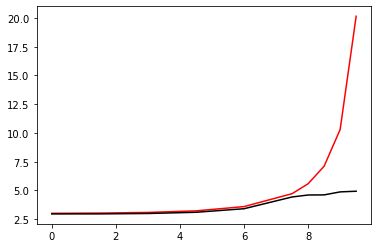

68000 0.07785522577245915
[2.95108604 2.9572903  2.98779719 3.08169406 3.37232425 4.41451904
 4.51981303 4.61679252 4.79731243 4.92039591]


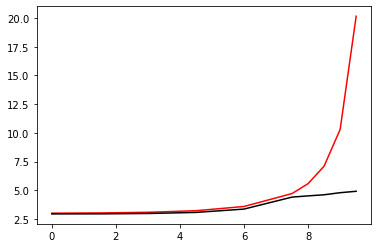

69000 0.0776110977455676
[3.00630099 3.01179644 3.03984371 3.12746334 3.39577651 4.37654388
 4.46787968 4.56105476 4.749897   4.85372616]


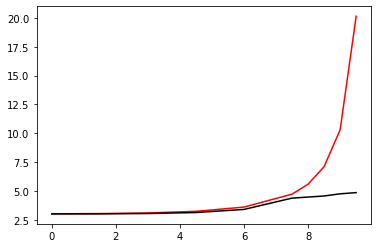

70000 0.07675755475849008
[2.96965961 2.97795073 3.01364538 3.11693199 3.41662829 4.43102394
 4.6202422  4.5938926  4.88290185 4.90614757]


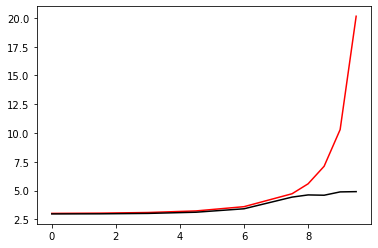

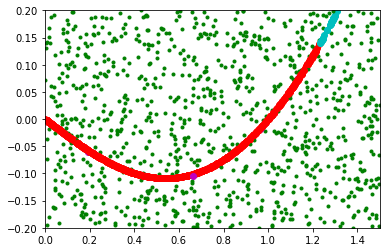

71000 0.08205830807326993
[2.93786318 2.94520121 2.99041315 3.11978753 3.47428766 4.54898473
 4.71978876 4.75275046 4.98420482 5.06703226]


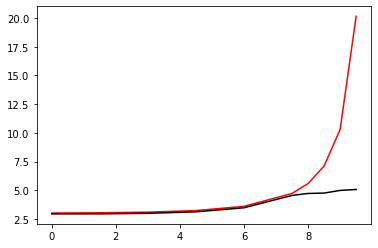

72000 0.40623632437914126
[2.7730672  2.79857526 2.85460085 2.98418785 3.32053966 4.32473568
 4.41753905 4.52121003 4.6550263  5.21045113]


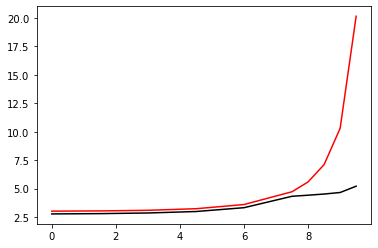

73000 0.07596584599599257
[2.94702494 2.96896989 3.03284591 3.17635043 3.51542996 4.52798151
 4.61662727 4.72038511 4.8833301  5.02603305]


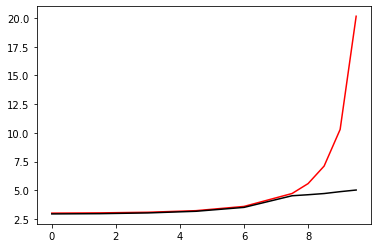

74000 0.07688037365156089
[2.97101666 2.98714612 3.03264914 3.14378206 3.44575256 4.472706
 4.66038132 4.65174192 4.94068816 4.97504119]


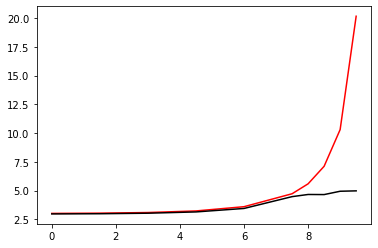

75000 0.07590463045038752
[2.98532776 2.98099085 2.99274657 3.06576311 3.33492331 4.38790266
 4.48220327 4.58696636 4.77939816 4.88402166]


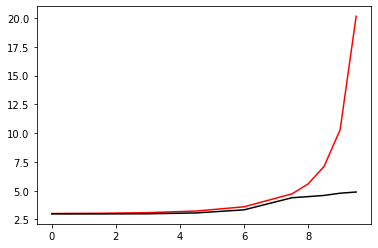

76000 0.07629943455480515
[2.95209095 2.9814438  3.0547494  3.20300068 3.52720118 4.4805161
 4.55925443 4.67948199 4.83026759 4.9546335 ]


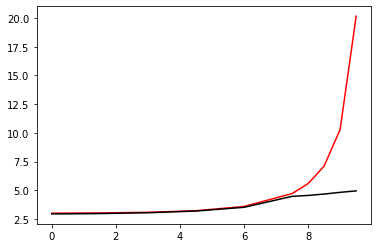

77000 0.07765296570432934
[3.01076208 3.01480458 3.03472845 3.10673503 3.35009867 4.32157521
 4.41340977 4.51983673 4.62588739 4.88848752]


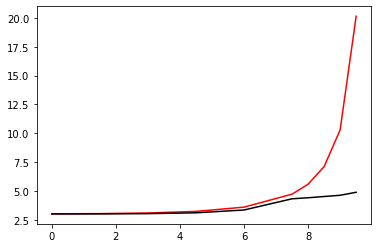

78000 0.1485640408184725
[2.8280991  2.88355957 2.96813713 3.09734977 3.35106621 4.16282465
 4.30584032 4.35131868 4.52618619 4.94378701]


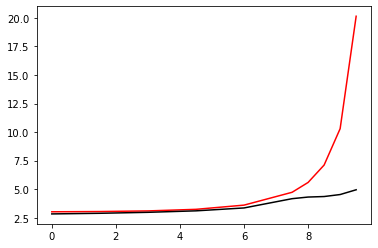

79000 0.08248094048617596
[2.93466313 2.94547695 2.9946803  3.12575641 3.47186417 4.54761231
 4.63925844 4.74597544 4.9331876  5.02524013]


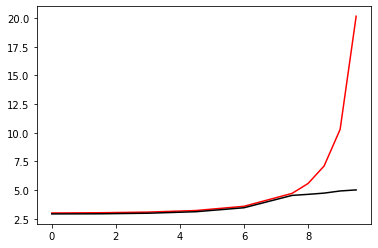

80000 0.07678163197164341
[3.01428617 3.00458737 3.00542368 3.06389693 3.30997568 4.29813545
 4.39661685 4.49713788 4.67628711 4.80351873]


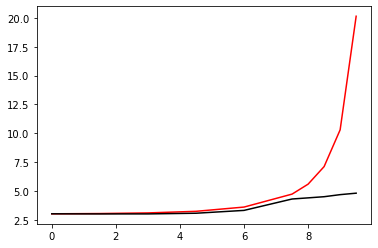

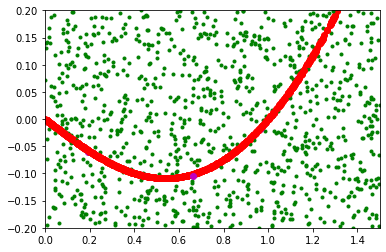

81000 0.08541749234721394
[3.13006407 3.11805526 3.11488029 3.16038229 3.36758376 4.27300486
 4.34810937 4.4458661  4.58055655 4.77610657]


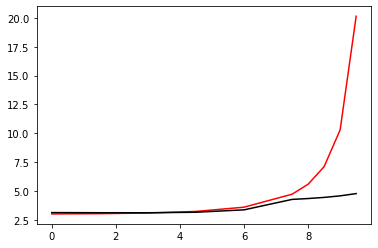

82000 0.08093447885388581
[2.94130153 2.94754507 2.98797332 3.10749145 3.44411521 4.52229048
 4.62355246 4.72635882 4.90781194 5.02444902]


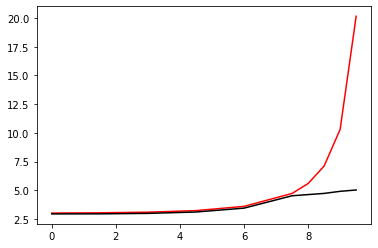

83000 0.4186164879836428
[2.75298915 2.79428001 2.87141568 3.02407154 3.38216429 4.44694644
 4.32801195 4.61974895 4.56819217 5.17654174]


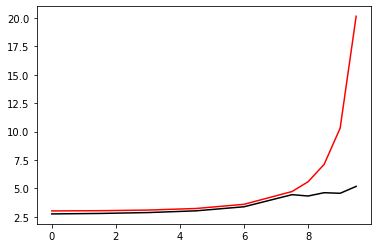

84000 0.07620359745762463
[2.97182127 2.98052953 3.01193672 3.10679208 3.39479808 4.41003141
 4.5590401  4.58613509 4.81916188 4.89954229]


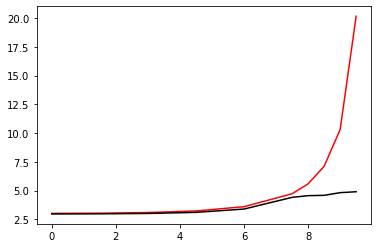

85000 0.07619960375623995
[2.95533336 2.96090019 2.99439054 3.09866898 3.41214131 4.49176944
 4.59291735 4.6970508  4.86599786 5.00835696]


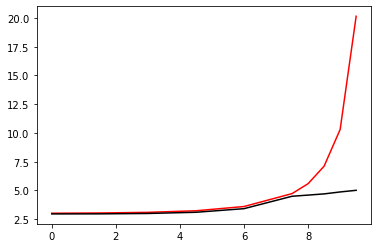

86000 0.07882343915221189
[2.99110248 3.01327354 3.06463128 3.18194732 3.4812153  4.27054239
 4.33249248 4.41407781 4.53308509 4.71289456]


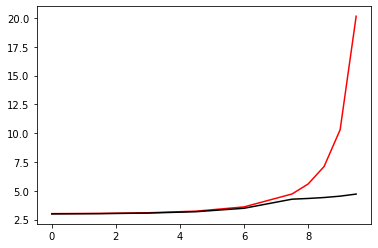

87000 0.07715571205194446
[2.95554514 2.99153291 3.07205618 3.21458989 3.5000877  4.39223375
 4.37831215 4.58526514 4.68128349 4.83086159]


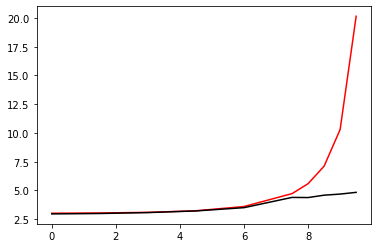

88000 0.5048506384918976
[3.2220779  3.27242852 3.36011163 3.52793789 3.89888435 4.72155174
 4.51838876 4.48204416 4.5393402  5.10513518]


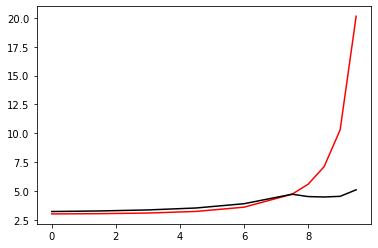

89000 0.07816068268388064
[3.040962   3.00218065 2.99585298 3.0780765  3.36889683 4.26787894
 4.33560392 4.42438127 4.55836542 4.73368872]


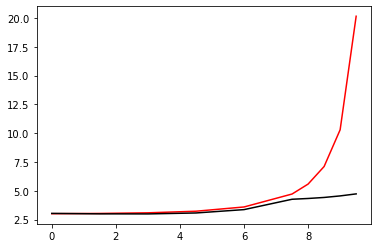

90000 0.07985006148420967
[2.93471238 2.95102808 3.00234456 3.13101625 3.46613911 4.52219523
 4.6255429  4.72390289 4.90695993 5.01573799]


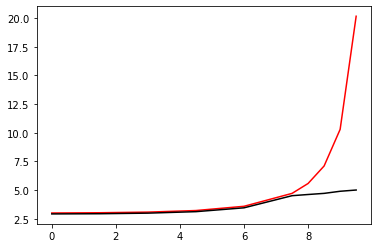

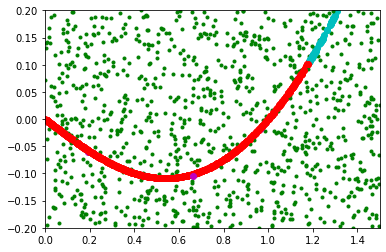

91000 0.07647033544948206
[2.96722847 2.98711334 3.03893797 3.15618512 3.43997169 4.24815634
 4.31738703 4.4101598  4.54268786 4.7271466 ]


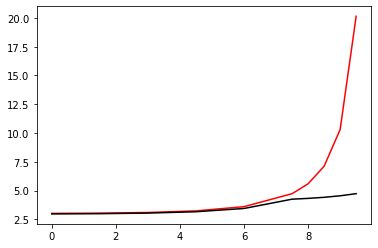

92000 0.08154028823290962
[2.93990422 2.9462174  2.98983459 3.12015183 3.48448118 4.55524627
 4.79845375 4.76731602 5.0623193  5.08386261]


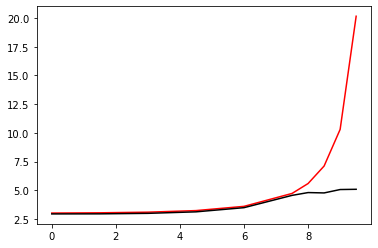

93000 0.07647117400475853
[2.99576974 2.99352934 3.01298248 3.1046545  3.38814402 4.31817789
 4.39926733 4.50210402 4.64941383 4.82374823]


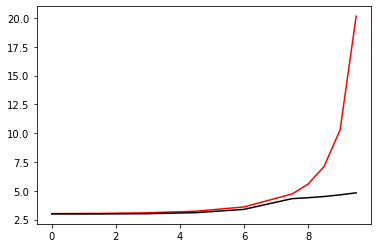

94000 0.07643825098269917
[2.95484272 2.96649474 3.01348049 3.13848789 3.47855969 4.51650847
 4.71195364 4.71842247 4.96811869 5.03891612]


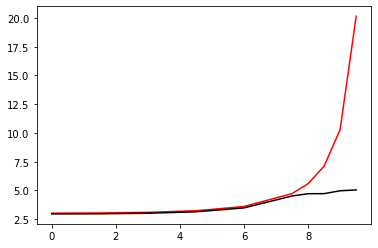

95000 0.07601365853787363
[2.98014739 2.97408517 2.99739366 3.10074332 3.41690052 4.33182834
 4.39348667 4.47003314 4.58580325 4.77567829]


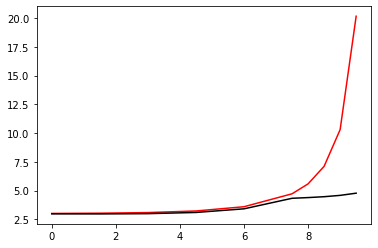

96000 0.07670272706890927
[2.96127212 2.97773964 3.02732266 3.15085793 3.47127496 4.46696282
 4.66376426 4.63726401 4.89530264 4.95856036]


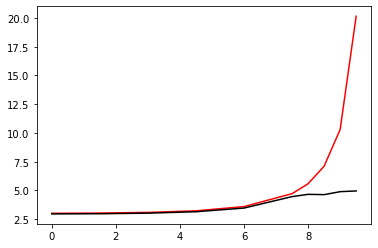

97000 0.11442751664343159
[2.87988048 2.94310818 3.04305623 3.19707192 3.47252181 4.192277
 4.24246823 4.36730814 4.51106707 4.85648262]


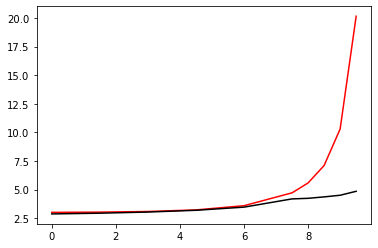

98000 0.07678118356599836
[2.97137552 2.99185356 3.0475672  3.17439345 3.47823079 4.30731524
 4.379356   4.47494993 4.61023503 4.78997257]


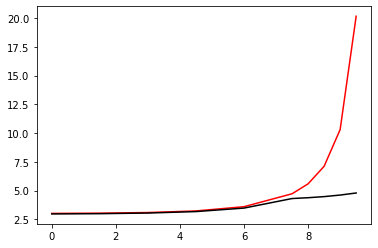

99000 0.07614077408995616
[2.97769393 2.98540511 3.01474818 3.10659462 3.38194306 4.33873688
 4.43986619 4.51867889 4.71528288 4.80493815]


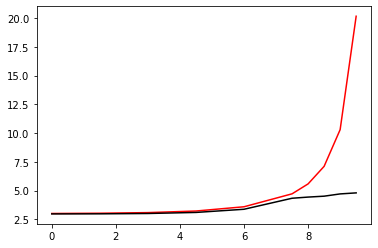

In [27]:
c_reg1=0.06
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h])
    for i in range (100):
        optimizer.apply_gradients(zip(gradients, [h]))
    if j%100==0: 
        print(j*10, Error_func(h, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy()), print(h.numpy())
        plt.plot(x, h_real, 'r-'), plt.plot(x, h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'co')
            plt.plot(x_data1[i], y_data1[i], 'ro')
            plt.plot(x_data3[i], y_data3[i], 'mo')
        plt.xlim(0.0, 1.5)
        plt.ylim(-0.2, 0.2)
        plt.show()

c_reg1=0.03

0 1.3966965863140572
[ 0.42711423  1.13245099  0.52036101  0.46068968  1.75019517  3.6138367
  4.45422609  7.01052448 11.47449792 20.14277284]


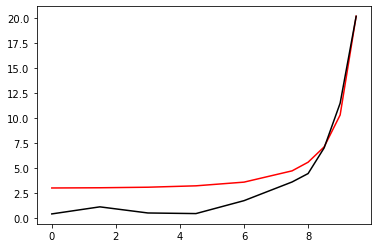

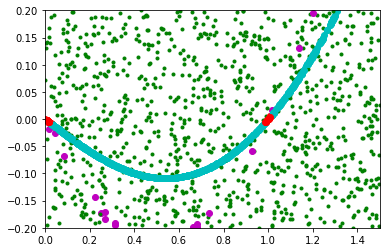

1000 1.0018345636128967
[ 0.7060599   0.66670882  0.63205989  0.76401661  1.85535175  8.31847003
  8.83998027  9.62083687 10.64109616 11.9856362 ]


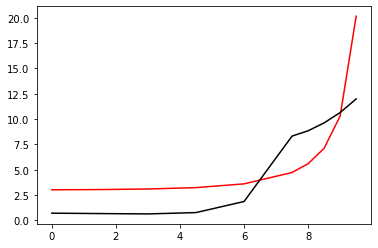

2000 0.9591350815551536
[0.93193722 0.95670782 1.00895051 1.14055667 1.64961686 4.22093285
 4.4254097  4.65456671 4.98363738 5.46607459]


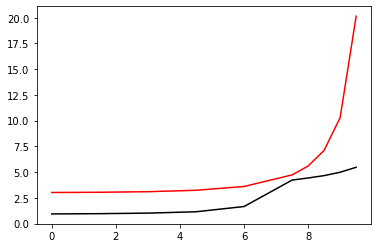

3000 0.081864843202064
[2.9587708  2.95956732 2.97310411 3.01562531 3.16349503 3.82071347
 3.88883416 4.07840925 4.31912283 4.64577676]


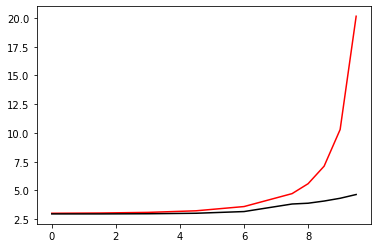

4000 0.0734058747373868
[2.95886254 2.96622832 2.99898678 3.10560882 3.44969591 4.8520878
 5.01707435 5.12203705 5.49963121 5.68130767]


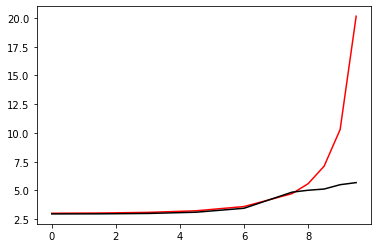

5000 0.082186260173587
[3.04137398 3.06617429 3.12883045 3.28092559 3.71196565 5.35412119
 5.43033754 5.69737181 5.86957953 6.27091457]


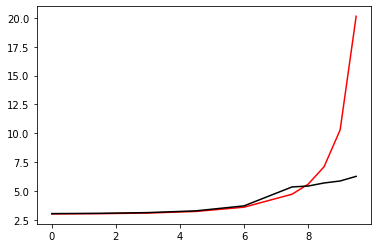

6000 0.0826253674157363
[3.0263094  3.06770143 3.17189966 3.38332593 3.8679444  5.44929745
 5.53916511 5.74272751 5.93182857 6.33898403]


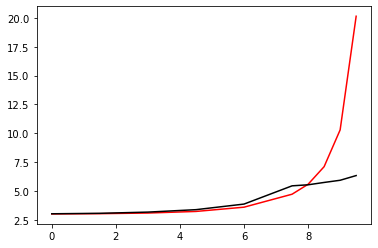

7000 0.0732432775865263
[2.92712278 2.95242424 3.04234358 3.26835164 3.84208182 5.46556357
 5.55283609 5.65577971 5.8597046  6.20856038]


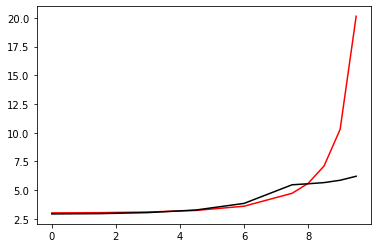

8000 0.07497346517239045
[3.03872525 3.0216929  3.02480459 3.15035732 3.63729348 5.40250587
 5.54809784 5.74017136 5.98728582 6.42473115]


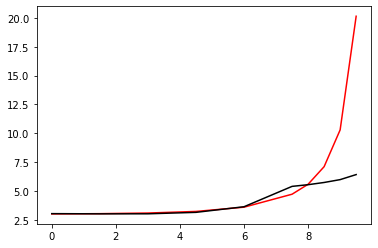

9000 0.5211939692958226
[2.71892977 2.7788801  2.89545262 3.13113434 3.6935639  5.52750035
 5.76936736 5.95043639 6.21947024 6.7160627 ]


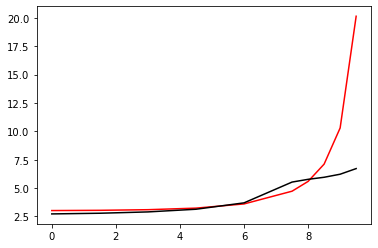

10000 0.08221766841310651
[3.01180744 3.06642168 3.19628419 3.45702275 4.02605955 5.69219404
 5.75985247 5.99513919 6.15798858 6.56706641]


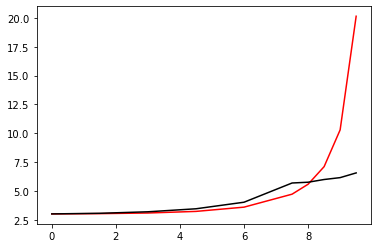

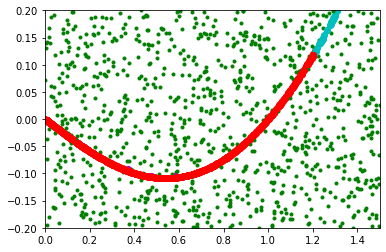

11000 0.0810675383221009
[3.04292208 3.04146607 3.09382234 3.29115576 3.85439015 5.67692257
 5.82798228 6.02394502 6.28450471 6.61566375]


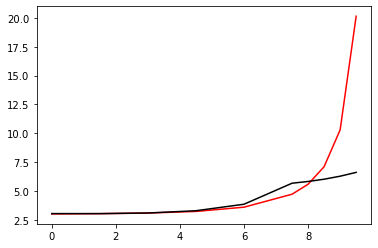

12000 0.08217216362634841
[3.04794798 3.05947023 3.12020702 3.29777421 3.78998845 5.45264449
 5.58733502 5.76195286 6.00343596 6.35691118]


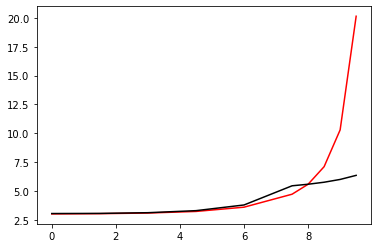

13000 0.08147424693849487
[2.98956772 3.03648821 3.15390495 3.40840651 3.97586278 5.52158898
 5.65222149 5.81955523 6.05395763 6.39060407]


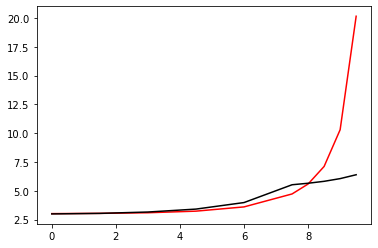

14000 0.07587670825423831
[2.96927839 3.01158254 3.12205285 3.36438146 3.93944523 5.71610731
 5.87147544 6.05527392 6.3005478  6.61865449]


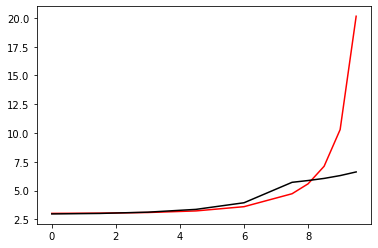

15000 0.07330542178433248
[2.94435498 2.96382265 3.04024009 3.26609849 3.90717685 6.02141062
 6.2034596  6.43373183 6.6939792  7.02682597]


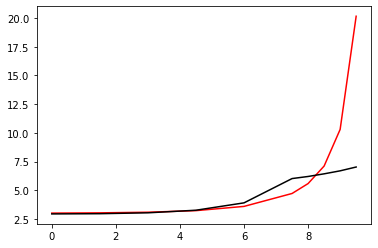

16000 0.11139781604093407
[2.90368097 2.91241617 2.98044634 3.20628074 3.87459475 6.13193377
 6.4164106  6.54869839 6.95260746 7.06404898]


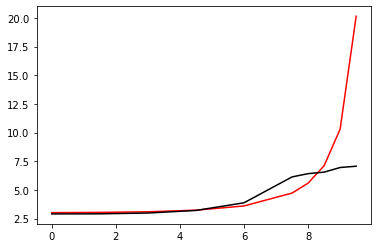

17000 0.0734283560450571
[2.92050914 2.97885003 3.0735415  3.26162238 3.75398456 5.30039088
 5.34342296 5.43960306 5.68871869 6.04768689]


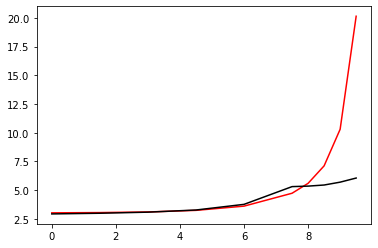

18000 0.08264696471794997
[3.01906595 3.06671049 3.17422862 3.39145579 3.88884359 5.36250756
 5.48250584 5.64261635 5.86982933 6.21406187]


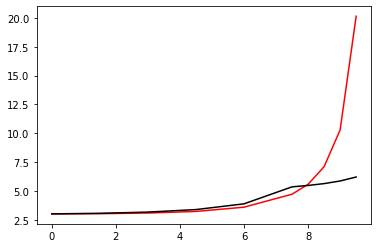

19000 0.657191079380713
[2.64166807 2.69093467 2.80019478 3.02757682 3.5733432  5.31024847
 5.41618118 5.61903015 5.89974827 6.55118239]


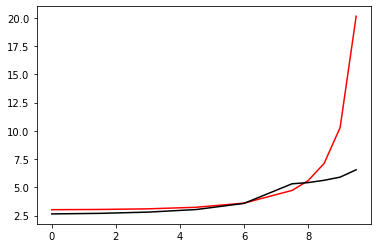

20000 0.08246835314218029
[3.0014439  3.05416305 3.17827347 3.42613693 3.96822351 5.50195724
 5.62763818 5.78432137 6.00779996 6.35014619]


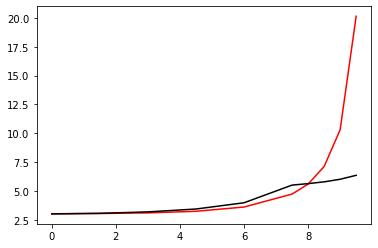

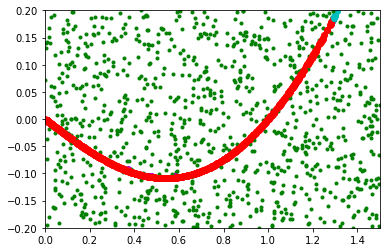

21000 0.08187478087938344
[3.05917354 3.05575992 3.09562961 3.27092161 3.81858934 5.69642108
 5.84804978 6.05217354 6.29385144 6.66527213]


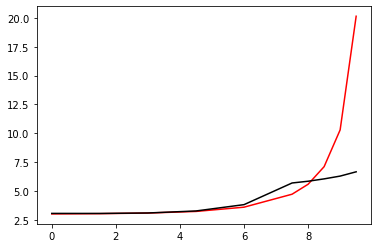

22000 0.07353795935463849
[2.96900274 2.97094276 3.03393177 3.22729559 3.74163957 5.21907584
 5.27957424 5.38489879 5.61426895 5.96989955]


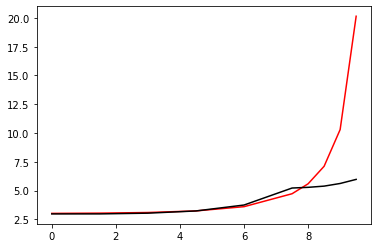

23000 0.08245395212999149
[3.00881095 3.05957259 3.18435858 3.43878458 4.01314048 5.65496718
 5.91770867 5.94876612 6.2680936  6.5990547 ]


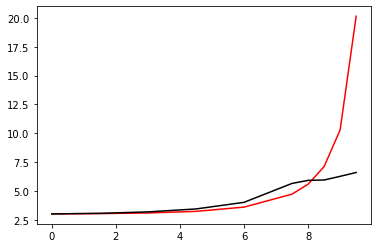

24000 0.0822351048454369
[3.04264937 3.05626504 3.13091031 3.35912508 3.96517883 5.7166572
 5.86407761 6.05528605 6.29943117 6.65324242]


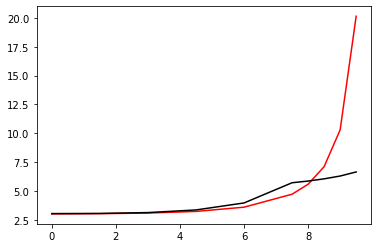

25000 0.08229075205460071
[3.02722714 3.0696314  3.16822406 3.3915653  3.95763615 5.69486355
 5.82649504 5.98890043 6.20735159 6.5437297 ]


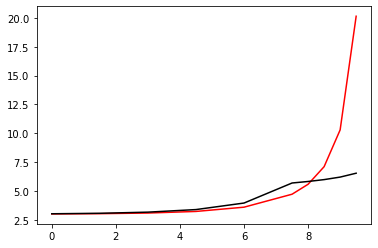

26000 0.0734124511252188
[2.89260895 2.96054594 3.09417573 3.35726632 3.95466096 5.7376601
 5.93048412 6.11219661 6.3227493  6.73746288]


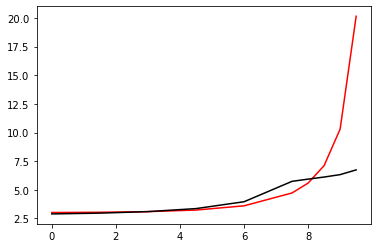

27000 0.07532726784526841
[2.9655409  2.99959864 3.09222819 3.2999005  3.79406713 5.11215884
 5.13622307 5.23278088 5.58389772 6.08452185]


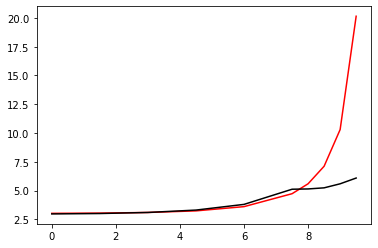

28000 0.6059833814328139
[2.66262597 2.73164598 2.87275623 3.13647312 3.70444373 5.48031588
 5.57938905 5.78854055 6.05774229 6.62703407]


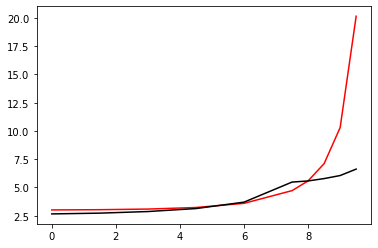

29000 0.07400462331011835
[2.9091358  2.96651842 3.08499949 3.30669525 3.77479649 4.8906345
 4.91516599 5.02181388 5.28079337 5.6488353 ]


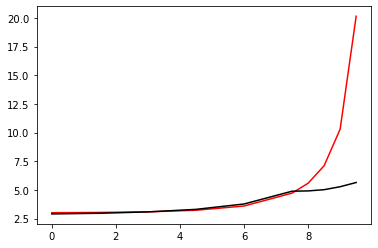

30000 0.08169529357779486
[3.00892423 3.04226921 3.13927232 3.36167618 3.89574461 5.4407918
 5.55417976 5.70010571 5.91165881 6.25659212]


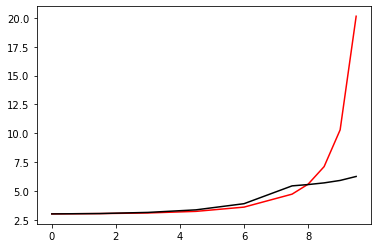

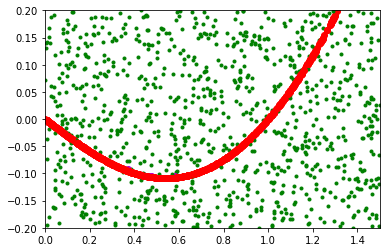

31000 0.08173191687854413
[3.02706238 3.06300701 3.16197312 3.39891927 3.99240114 5.88345071
 6.03432358 6.23706016 6.45889097 6.86436251]


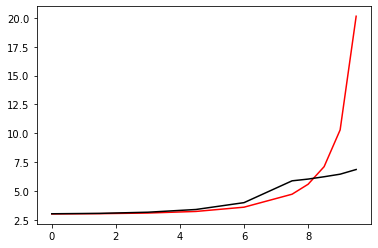

32000 0.10501963028136874
[2.8775924  2.91574477 3.03399157 3.32007861 4.03773741 6.28551798
 6.55766819 6.69134089 7.0544649  7.21842   ]


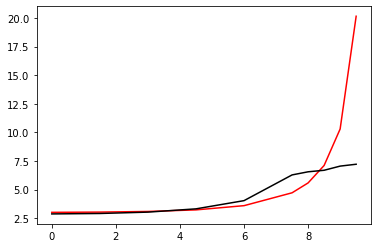

33000 0.07317576627402521
[2.96019798 2.97505837 3.03353888 3.20642729 3.69069225 5.31057375
 5.4439145  5.64523594 5.87679567 6.29404947]


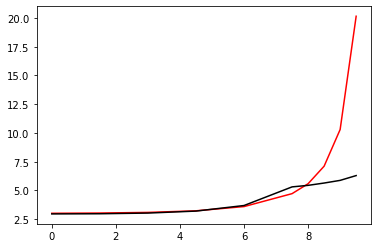

34000 0.07365612416762146
[2.94866705 2.97444342 3.04923699 3.21922562 3.63750219 5.02257944
 5.07124408 5.13693767 5.32071665 5.67977969]


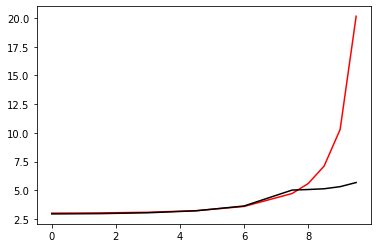

35000 0.07395400895091034
[2.96345573 2.99755794 3.06630441 3.21155563 3.58179352 4.84212878
 4.95699461 5.12255339 5.35080253 5.68184222]


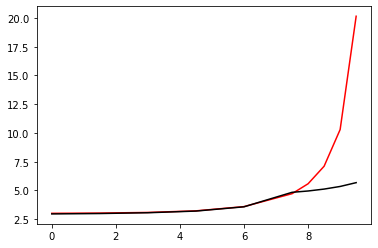

36000 0.08315119104075093
[3.03550631 3.09243658 3.19603844 3.38912729 3.82155891 5.0424926
 5.13821143 5.26349788 5.46111378 5.80705962]


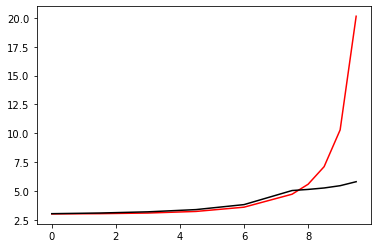

37000 0.08195616100587602
[2.99435291 3.04898983 3.16595408 3.39811655 3.92407705 5.49883264
 5.60782279 5.79218094 6.01102741 6.35223283]


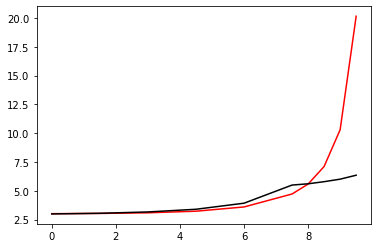

38000 0.08088311095744807
[3.0055515  3.05090747 3.1645099  3.42782547 4.07923944 6.02217102
 6.19023428 6.34472069 6.55792877 6.91941058]


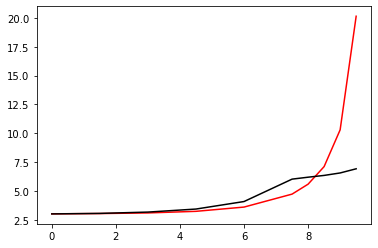

39000 0.08203617873863946
[3.04233964 3.06233778 3.12516749 3.30493151 3.83121072 5.65956219
 5.80941642 6.00018523 6.24110036 6.58548018]


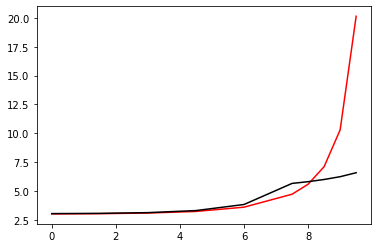

40000 0.07644265277946506
[2.98012616 3.0201036  3.11490733 3.34153301 3.91807135 5.73716208
 5.88554143 6.07840087 6.31470364 6.72082656]


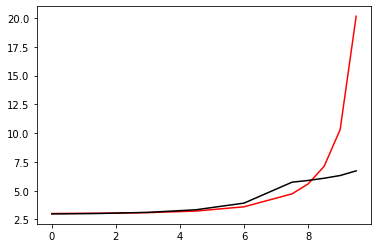

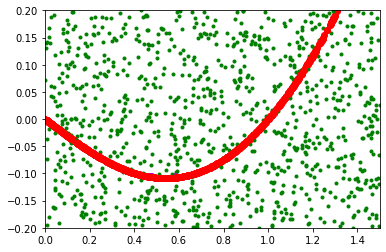

41000 0.0821627568671817
[3.07704601 3.07086768 3.08664773 3.20466521 3.64480972 5.31364165
 5.45189069 5.63298985 5.86690849 6.23378918]


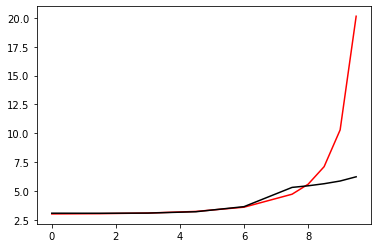

42000 0.20055785248044172
[2.77124323 2.83658989 2.96407355 3.20746032 3.75522285 5.43762213
 5.61712273 5.83241092 6.06841615 6.56308316]


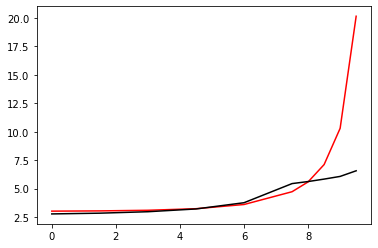

43000 0.07301916191103372
[2.94659619 2.95859078 3.02175238 3.20452994 3.70820144 5.39680851
 5.50802736 5.6497207  5.87465822 6.220996  ]


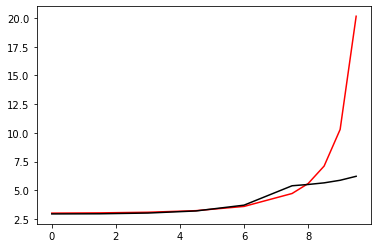

44000 0.09578620655315755
[2.91818795 2.92960873 2.98752288 3.15984677 3.64426641 5.17875757
 5.01651392 5.13487113 5.44667767 6.09927101]


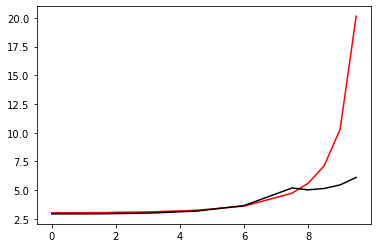

45000 0.07348878991888592
[2.96846024 2.97935568 3.02351697 3.15690995 3.5375195  4.81102244
 4.93349287 5.11083757 5.36779422 5.71286975]


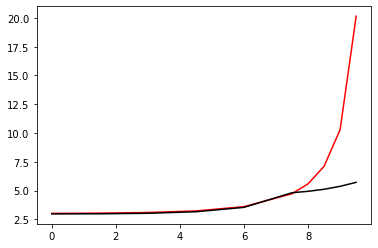

46000 0.07377648010523655
[2.95061683 2.9892456  3.07481872 3.25885696 3.69933174 5.00290016
 5.12574397 5.28332662 5.51243475 5.83842606]


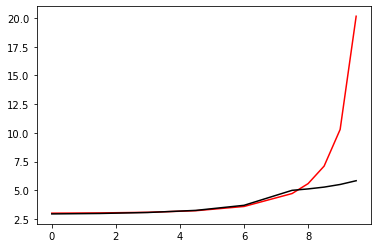

47000 0.08167652152766464
[3.00145741 3.04690978 3.16763975 3.43414275 4.05979073 5.84652258
 6.04177877 6.17580732 6.48294502 6.72997144]


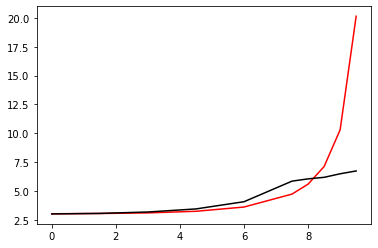

48000 0.3949691381580411
[2.74678333 2.8046091  2.91485244 3.1384105  3.66266431 5.35195433
 5.50898043 5.70588123 5.98576143 6.52685724]


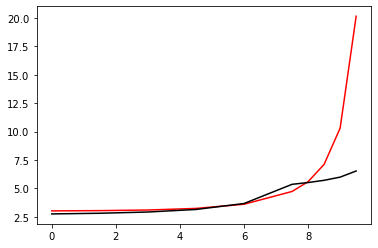

49000 0.07352122250116377
[2.94472302 2.97347648 3.05322675 3.22655677 3.62272853 4.86514821
 4.98409809 5.15717013 5.39960108 5.79794925]


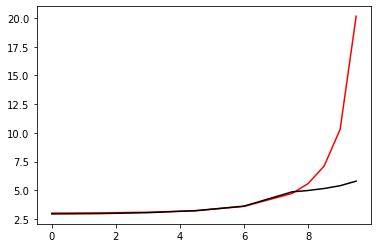

50000 0.0829796612698009
[3.0110633  3.07535659 3.206136   3.44403677 3.93630473 5.24997777
 5.35329059 5.48934242 5.69482315 6.03997232]


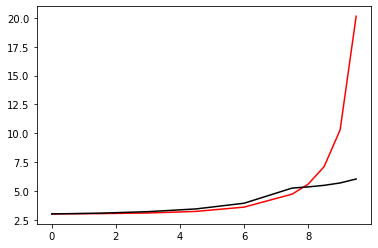

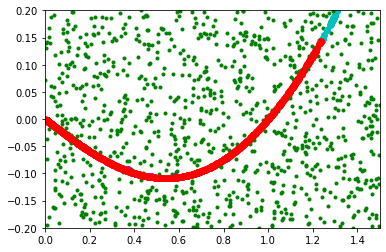

51000 0.07873118289905345
[2.97282265 3.02013639 3.1431571  3.4039303  3.99822268 5.83340824
 5.86010606 6.16847648 6.33379991 6.72121321]


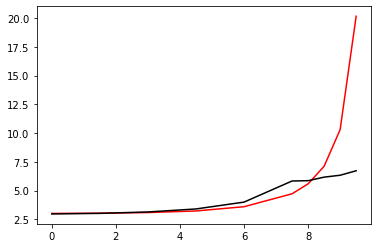

52000 0.08119338396655966
[3.01786097 3.03446038 3.12049007 3.35477874 3.94285469 5.6755891
 5.81041326 5.97858136 6.20882999 6.54447272]


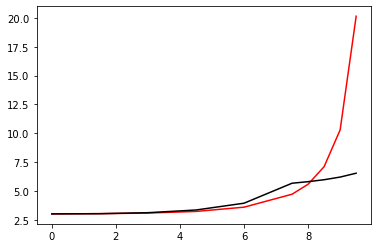

53000 0.07365176836763156
[2.96539859 2.98804682 3.06765223 3.27376429 3.82460665 5.55302453
 5.63595668 5.74260687 5.94619395 6.29036991]


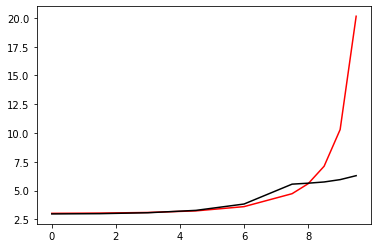

54000 0.08234365854725094
[3.00363242 3.05761849 3.16809298 3.38821422 3.89506591 5.39151033
 5.51588237 5.67801493 5.9082855  6.24960554]


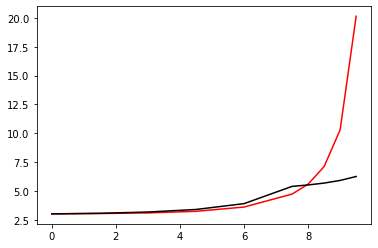

55000 0.07920998810658597
[3.01114757 3.02681104 3.10194383 3.30559486 3.84352856 5.55090682
 5.64660848 5.75163127 5.92441364 6.26044961]


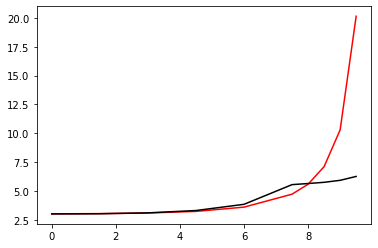

56000 0.6650373148849364
[2.6754788  2.70029672 2.77096427 2.98217793 3.61621866 5.88606465
 5.99279015 6.30571007 6.43428388 7.09646397]


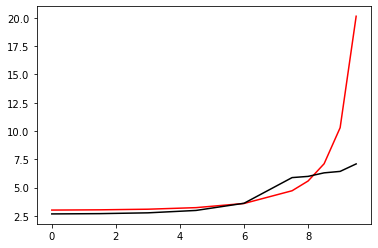

57000 0.08034031018818939
[3.02923143 3.04006954 3.10182058 3.29565531 3.85486792 5.7141232
 5.86282299 6.05325796 6.2968507  6.66472465]


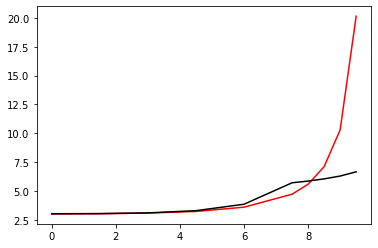

58000 0.0752238752179882
[3.00806676 3.00759124 3.06810604 3.28258063 3.89517604 5.85682479
 6.01470738 6.20924438 6.46328343 6.77502166]


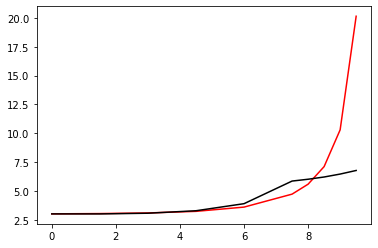

59000 0.09937276727929446
[3.03090169 3.06675414 3.17226248 3.44048114 4.14345105 6.26085646
 6.41321117 6.60858648 6.85493069 7.12429363]


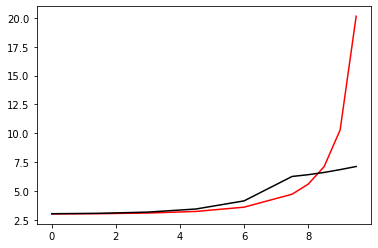

60000 0.07354544861218959
[2.93650807 2.94037371 3.00122283 3.22889324 3.93614599 6.38286214
 6.51655697 6.9084988  7.05273986 7.39399082]


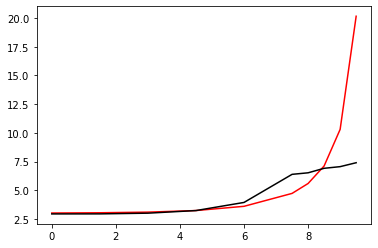

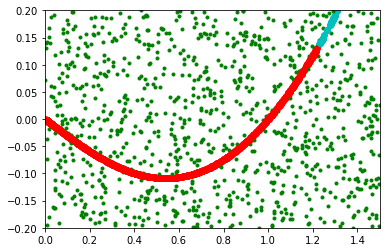

61000 0.07463540182049141
[2.96753044 2.99729428 3.0974639  3.35938142 4.03833096 5.87632054
 6.0380683  6.23153297 6.48460099 6.80042572]


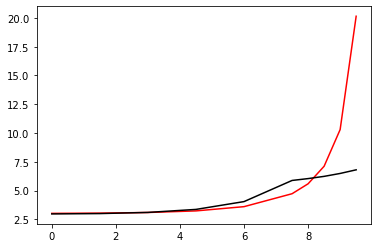

62000 0.07380150544492126
[2.91540955 2.94093233 3.03241432 3.28884912 3.99579417 6.36531893
 6.42495683 6.80655757 6.97221718 7.31746764]


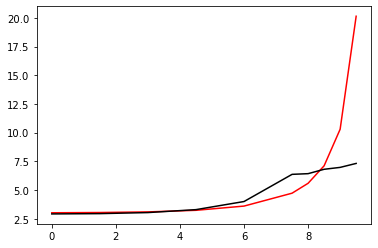

63000 0.07818392412554383
[3.0356566  3.02600107 3.06636318 3.25925036 3.8619492  5.78898875
 5.9440384  6.13479329 6.3791431  6.70779362]


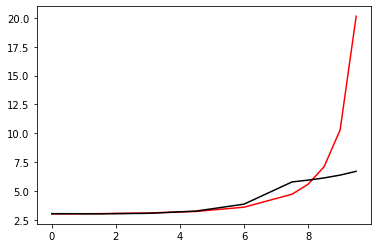

64000 0.07900906202215922
[2.98418814 3.02127856 3.13336686 3.39829364 4.03511484 5.90595853
 6.05763682 6.24148392 6.47091606 6.8026103 ]


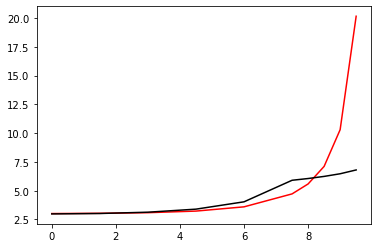

65000 0.08007288520113967
[3.01581719 3.03480747 3.10974618 3.32830036 3.93517128 5.83970293
 5.98510679 6.15805862 6.38400082 6.70172844]


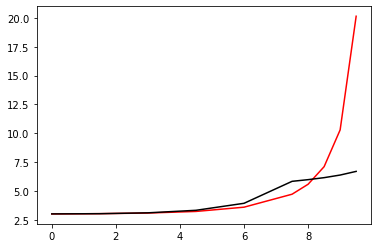

66000 0.07357463258898425
[2.9580568  2.99138099 3.07749174 3.31782944 3.98125097 6.11329614
 6.28211415 6.49115864 6.74130399 7.08514173]


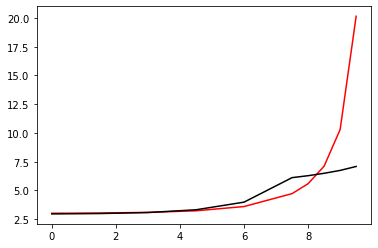

67000 0.07353637729718014
[2.93165406 2.98496366 3.10446273 3.36227555 3.9926097  5.9013679
 6.06182646 6.24736606 6.49286666 6.78638017]


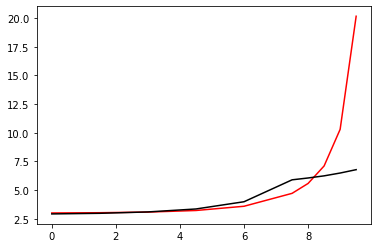

68000 0.08905578272587378
[2.89663134 2.92126545 3.01702859 3.27721369 3.97757778 6.26103351
 6.46894949 6.66764211 7.00360417 7.18306838]


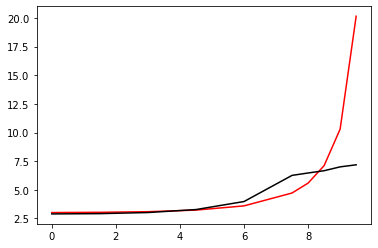

69000 0.11629042966877312
[2.87237479 2.91419597 2.99819658 3.20683127 3.77675476 5.68606693
 5.83137313 6.06816254 6.29318382 6.80172127]


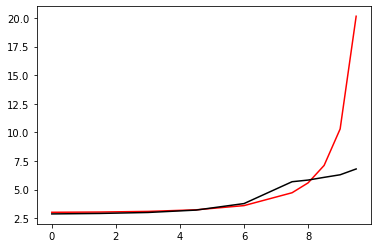

70000 0.08226400486043192
[3.04202499 3.06293318 3.13176908 3.31473142 3.81386475 5.4775581
 5.61718455 5.80418987 6.04695846 6.44588971]


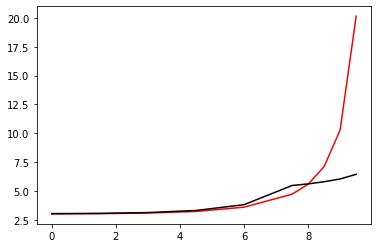

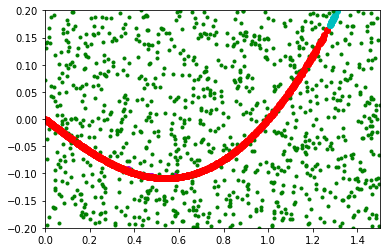

71000 0.07786244519597452
[2.97941854 3.02665481 3.1308313  3.35244699 3.88167261 5.57909725
 5.72098084 5.90637821 6.11358323 6.52303402]


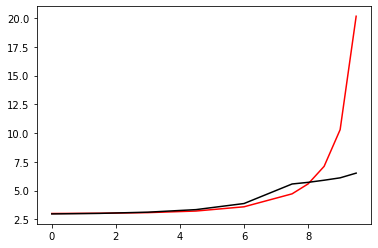

72000 0.07319999305987374
[2.93203808 2.95930484 3.04272428 3.25204679 3.80553603 5.60606768
 5.68190066 5.77724679 5.96974568 6.31536957]


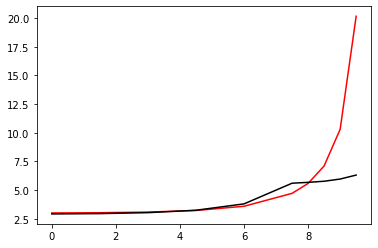

73000 0.08099477079708592
[3.03985442 3.03790163 3.09452404 3.30925673 3.93881851 5.92492738
 6.07615961 6.25715938 6.49430947 6.8097709 ]


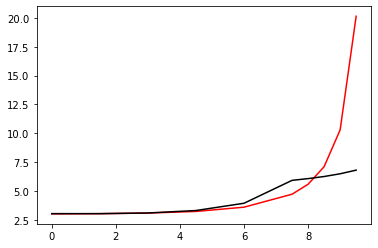

74000 0.07912292377180274
[2.95323908 3.02262767 3.16926704 3.44685096 4.04836855 5.731065
 5.8723334  6.05053925 6.27703219 6.62045154]


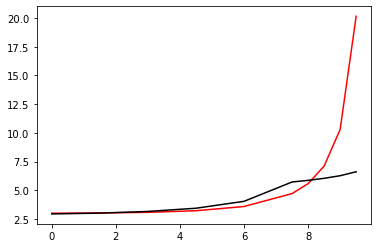

75000 0.08242057337601547
[3.03170691 3.07023829 3.14447097 3.3284914  3.84343235 5.46734773
 5.58432555 5.72793794 5.93452898 6.26931844]


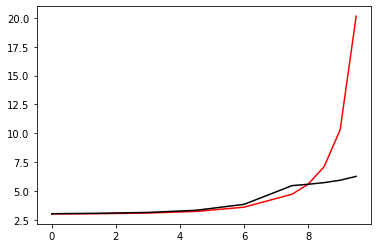

76000 0.08158226181929396
[3.02912084 3.04621496 3.11959113 3.32937038 3.88610773 5.63222529
 5.77491346 5.9627694  6.20631635 6.55263229]


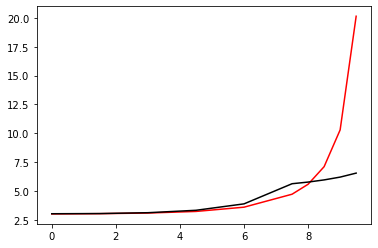

77000 0.5897389688418573
[2.74286045 2.7546392  2.80285636 2.98538327 3.57370856 5.67379382
 5.82816848 6.05128791 6.30179741 7.0227495 ]


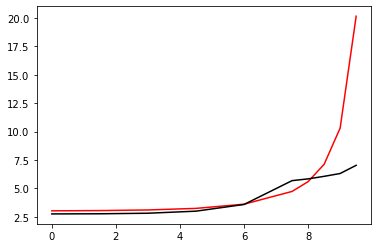

78000 0.08160378355271249
[3.02559649 3.06377284 3.16200861 3.39637315 4.00881133 5.99580848
 6.05922708 6.32647989 6.49301811 6.87886915]


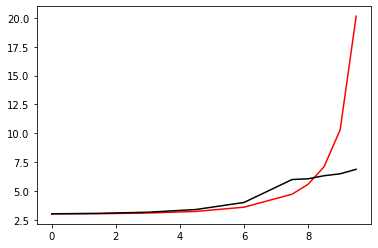

79000 0.0822124824586258
[3.04550469 3.06215003 3.12579885 3.31351237 3.8395587  5.60146537
 5.74639428 5.94349939 6.17992433 6.58397621]


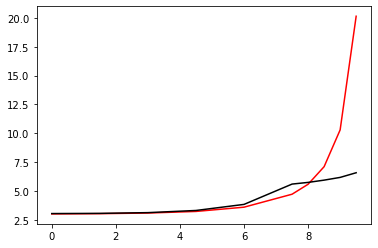

80000 0.073413345235538
[2.92455122 2.9607678  3.06955854 3.32641805 3.96166719 5.99620217
 6.09785332 6.3863475  6.60768125 6.94218459]


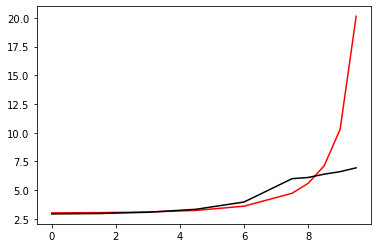

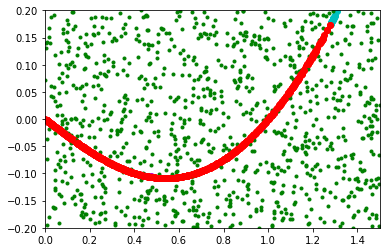

81000 0.07360569065913279
[2.99052714 2.97766086 3.03502874 3.27125788 3.95988282 6.04360468
 6.2035334  6.39490027 6.64874215 6.94537539]


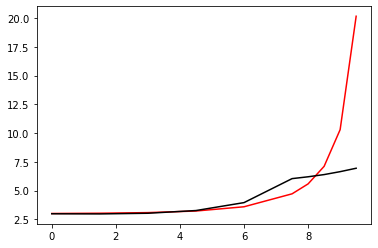

82000 0.0758476977073557
[2.96949247 3.01059415 3.13344427 3.4319896  4.18363243 6.41668365
 6.54905571 6.78256162 7.0622184  7.28415335]


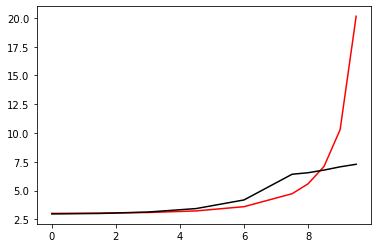

83000 0.07802821705597697
[3.00629031 3.02391122 3.09830707 3.31425793 3.89441886 5.6662505
 5.81677108 6.00816383 6.2550437  6.58055209]


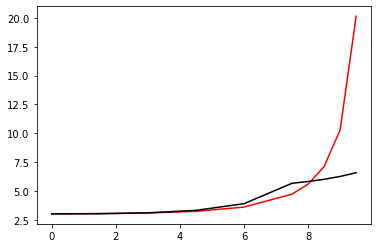

84000 0.07659174747171735
[2.97866843 3.01856233 3.12289005 3.3639914  3.97973613 5.94453873
 6.13727442 6.3228905  6.57171968 6.88423715]


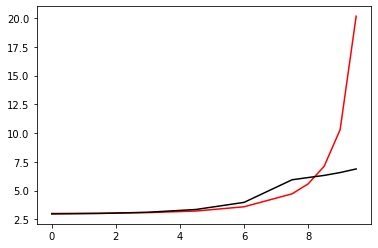

85000 0.0729782338195507
[2.97778929 2.95353309 2.9638372  3.09274727 3.57261355 5.25115406
 5.31284388 5.40343433 5.62425648 5.97790537]


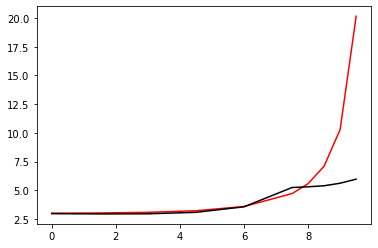

86000 0.07318288134917411
[2.97179511 2.98280176 3.03314749 3.18898122 3.66046059 5.39231339
 5.5466092  5.77004161 5.99994776 6.35889728]


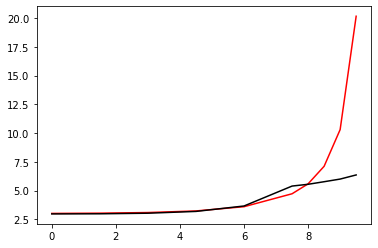

87000 0.07366771470526084
[2.89488926 2.96332906 3.09883522 3.36983068 3.99792813 5.81466061
 6.07734086 6.14424958 6.4154729  6.84375655]


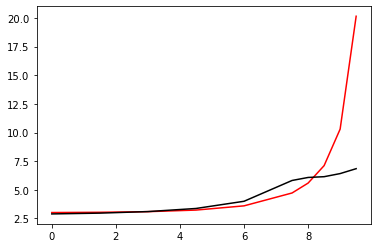

88000 0.0805752491718604
[3.0390297  3.04142161 3.09181173 3.29288163 3.90349688 5.92747763
 6.08931347 6.29532073 6.55150553 6.88727504]


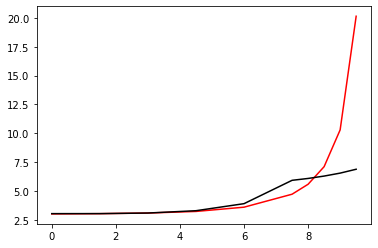

89000 0.10777128792116113
[2.91186038 2.92183133 2.98204324 3.16354459 3.66881971 5.35060845
 5.19639294 5.32484407 5.4160973  6.29274119]


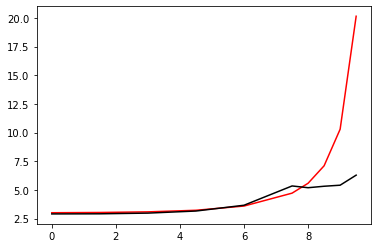

90000 0.0809046671954465
[3.02040325 3.04333462 3.11991568 3.32292379 3.86368027 5.6277392
 5.77470296 5.96793779 6.21669083 6.58164123]


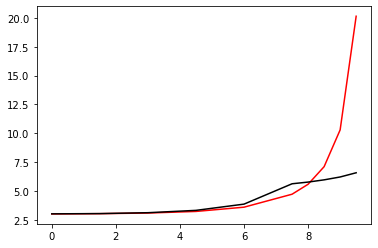

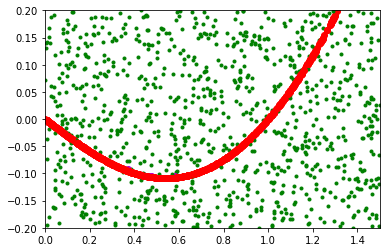

91000 0.6464526780811476
[2.65220469 2.69969002 2.81836076 3.07647627 3.6936256  5.53282009
 5.68057412 5.78012708 6.10973445 6.82178262]


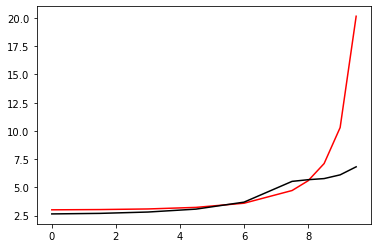

92000 0.0806055613602167
[3.01888965 3.04428608 3.11645513 3.31014692 3.84783049 5.59340639
 5.73582539 5.92452319 6.17063514 6.50882658]


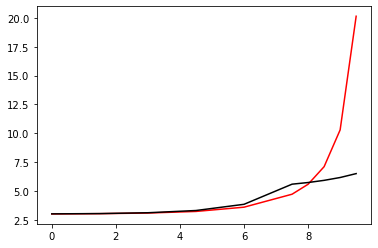

93000 0.07345761926996403
[2.91408754 2.97310575 3.10078818 3.36713017 4.00901722 6.00480879
 6.17897615 6.37451203 6.6252332  6.91661668]


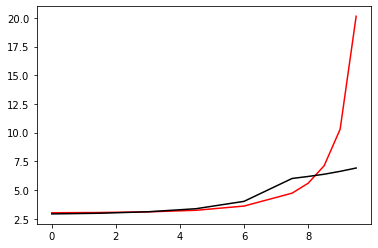

94000 0.07332521536307096
[2.95836797 2.97457483 3.0433983  3.25798397 3.88375917 5.98846739
 6.16796821 6.3985405  6.662135   6.99087271]


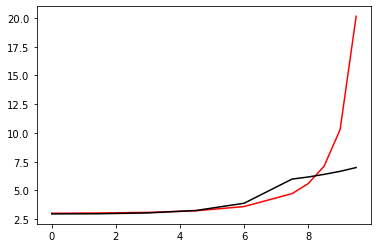

95000 0.08178573971849043
[3.02788836 3.0432284  3.12029039 3.33490105 3.88712389 5.47740389
 5.60800188 5.77391135 6.00441359 6.34606999]


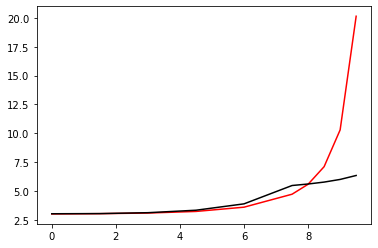

96000 0.1266373307803367
[3.09212729 3.11174627 3.17880827 3.37030032 3.89929403 5.41786937
 5.12048438 5.40191571 5.78541545 6.30720227]


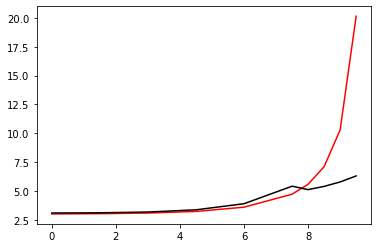

97000 0.07390141727970895
[2.91700499 2.97032697 3.08468584 3.30536158 3.79651096 5.17224941
 5.1803627  5.2171281  5.40604398 5.76172931]


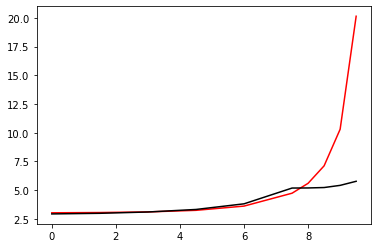

98000 0.09303277317236519
[2.86219381 2.93454744 3.08214504 3.35739123 3.93626334 5.60294286
 5.77666894 5.96516535 6.16670795 6.5968447 ]


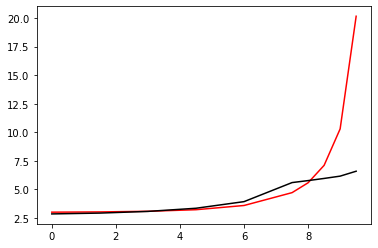

99000 0.07686614138530719
[2.96334312 3.01202239 3.12969941 3.38479255 3.98053625 5.66032923
 5.7702572  5.89497427 6.08750206 6.42099079]


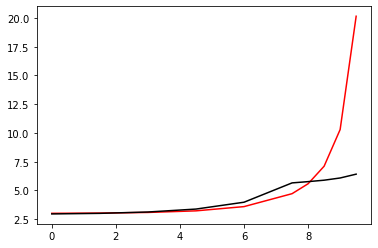

In [21]:
c_reg1=0.03
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h])
    for i in range (100):
        optimizer.apply_gradients(zip(gradients, [h]))
    if j%100==0: 
        print(j*10, Error_func(h, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy()), print(h.numpy())
        plt.plot(x, h_real, 'r-'), plt.plot(x, h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'co')
            plt.plot(x_data1[i], y_data1[i], 'ro')
            plt.plot(x_data3[i], y_data3[i], 'mo')
        plt.xlim(0.0, 1.5)
        plt.ylim(-0.2, 0.2)
        plt.show()

c_reg1=0.01

0 1.1133738827736523
[ 1.66113567  1.67571051  1.48494318  1.92840766  2.93098022  3.32324807
  3.97935051  6.42754152  9.35293977 20.99366157]


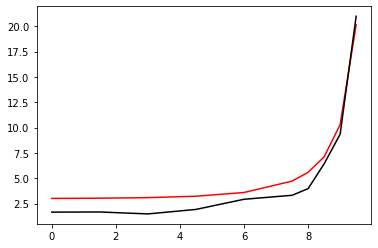

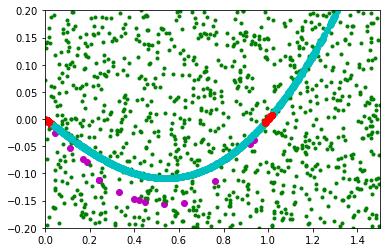

1000 0.7649569329093346
[ 2.7104711   2.69142958  2.67793499  2.82299705  3.08133483  6.9816582
  7.61030782  8.71638782 10.32730027 12.75433706]


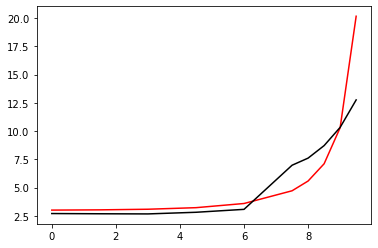

2000 0.06410045207178379
[3.03021507 3.05230231 3.08784963 3.19737589 3.66056031 7.12135134
 7.41899183 7.81580437 8.37979634 9.17620531]


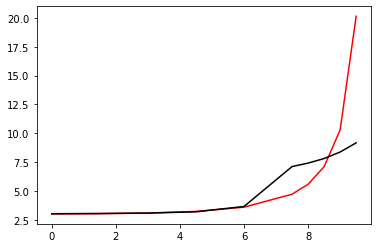

3000 0.06498460626230501
[3.00493499 3.02958283 3.09005325 3.25591283 3.88702761 6.99460388
 7.20965927 7.49983513 7.98018213 8.81713854]


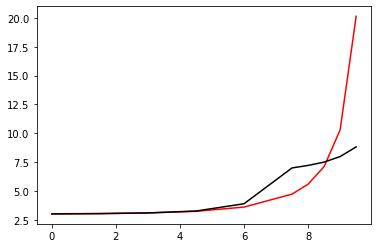

4000 0.13231081673369974
[3.03450349 3.05593856 3.13524214 3.38075481 4.18441062 7.54431104
 7.8366054  8.23800339 8.79450645 9.50543657]


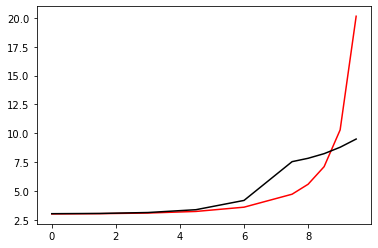

5000 0.06568718853934354
[2.91720103 2.95227493 3.05397889 3.32343216 4.1379118  7.32384585
 7.61218362 8.01438338 8.57633928 9.39164221]


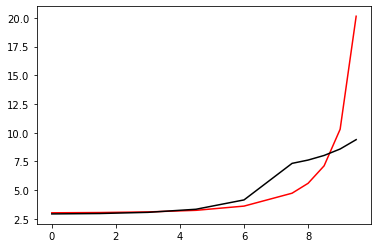

6000 0.06353353129783068
[2.96310528 2.99191669 3.08216944 3.33229552 4.09054235 7.0704786
 7.34554005 7.74021641 8.3083277  9.12234837]


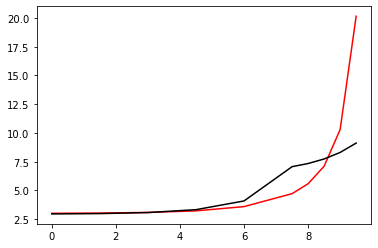

7000 0.06767486019130564
[3.06713465 2.99875174 2.9800715  3.12083828 3.75165013 6.55498732
 6.78959557 7.12827477 7.66318632 8.54348975]


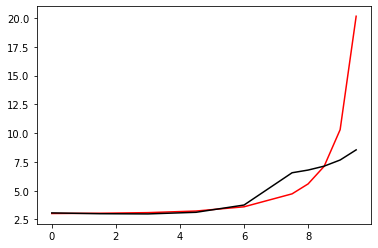

8000 0.6376640751763353
[3.08228855 3.1263102  3.22718874 3.50155214 4.35943686 7.61454203
 7.86022888 8.20542754 8.73016683 9.37922602]


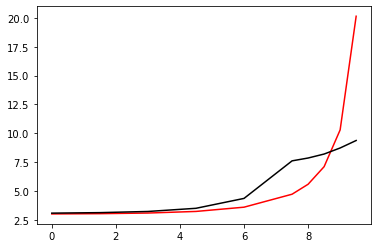

9000 0.05977069374819405
[2.96977041 3.01815849 3.12941569 3.40214482 4.19153865 7.11946094
 7.35432905 7.6648939  8.14879314 8.95055514]


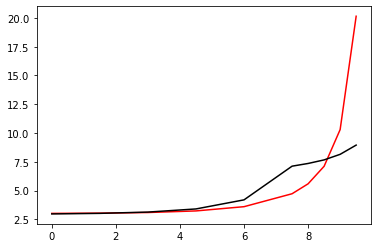

10000 0.5980125344545293
[3.02118003 3.07701304 3.21945187 3.56526495 4.51449206 8.01689566
 8.32221002 8.72985458 9.26263038 9.86193549]


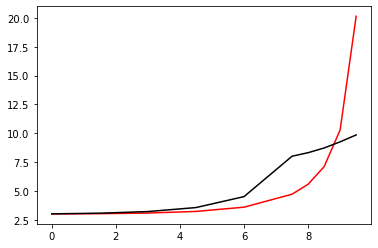

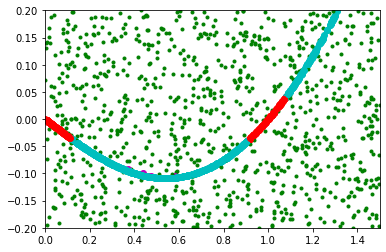

11000 0.06586543569484388
[2.92416267 2.96897164 3.08742639 3.36807021 4.14210929 7.06446175
 7.28927172 7.60109556 8.09822222 8.93686428]


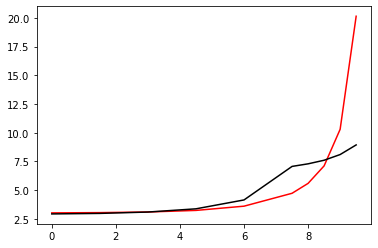

12000 0.0614863015563084
[2.93895289 3.01766299 3.1941919  3.54716796 4.39828878 7.35968583
 7.61759587 7.97741006 8.51282387 9.2605012 ]


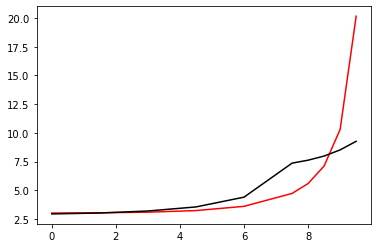

13000 0.059512997129257277
[2.93500059 2.98038483 3.11176749 3.42823904 4.25138882 7.22695475
 7.50213544 7.88390409 8.43825564 9.2113183 ]


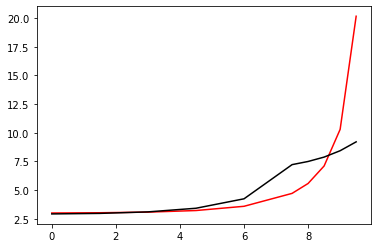

14000 0.0628242843191428
[3.0037168  3.02920356 3.1238231  3.38772269 4.13466018 6.97086662
 7.24513012 7.6373443  8.21487013 8.97860818]


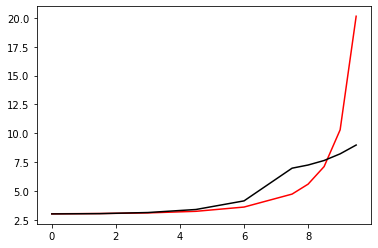

15000 0.06693550946152968
[3.06340637 3.01565385 3.02243098 3.19197112 3.87766704 6.91485072
 7.0563818  7.33578908 7.86773172 9.00629082]


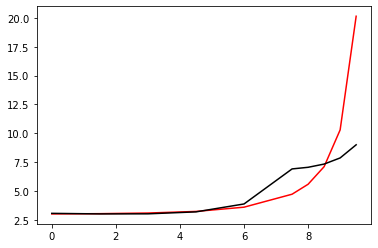

16000 0.06437985766451615
[3.06820454 3.03466283 3.02635021 3.17956988 3.89033987 6.97382007
 7.25403446 7.65323402 8.23126231 9.02599548]


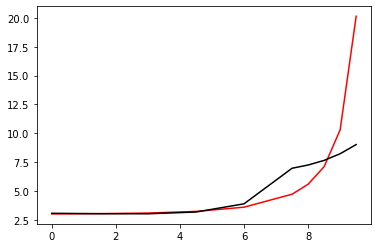

17000 0.061872129092037834
[3.02661483 3.02028217 3.05698482 3.2495106  3.98940313 7.11882908
 7.37809764 7.73651912 8.26972488 9.07667957]


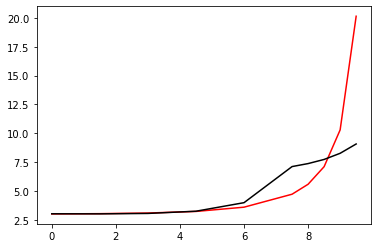

18000 0.6369213192745271
[3.11729173 3.12590035 3.17367629 3.40062101 4.25731421 7.78466408
 8.07899448 8.46300311 9.00661274 9.60680339]


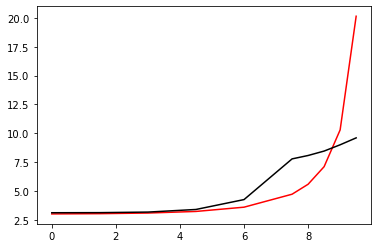

19000 0.06735988210675684
[2.90892418 2.99726859 3.13002072 3.38732982 4.10018264 6.59583172
 6.69094733 6.97226813 7.5487775  8.43350708]


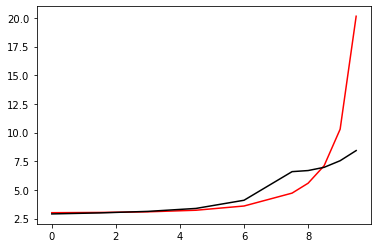

20000 0.06308013962084114
[3.00598996 3.03150416 3.12043721 3.38298001 4.17475877 7.25688442
 7.5358982  7.91444295 8.4700938  9.21186063]


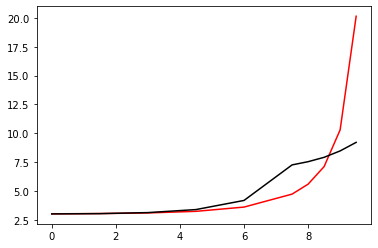

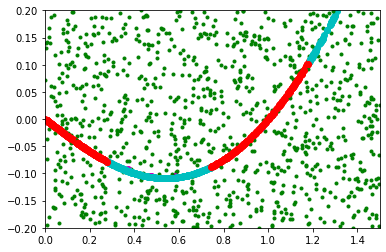

21000 0.06747670092063282
[3.11599031 3.01436838 2.92995503 3.01643769 3.67198858 6.80910075
 7.10000661 7.51670563 8.10947581 8.94726905]


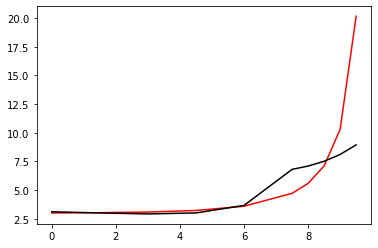

22000 0.0630841936306388
[3.01225624 3.02179652 3.06316779 3.24179123 3.95832606 7.08280548
 7.35291429 7.73047149 8.27900859 9.14523091]


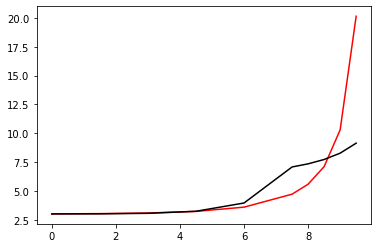

23000 0.06307759359324168
[2.97493834 3.02520861 3.12177597 3.35077891 4.06033672 6.87727973
 7.11958601 7.46439419 8.00004325 8.81253843]


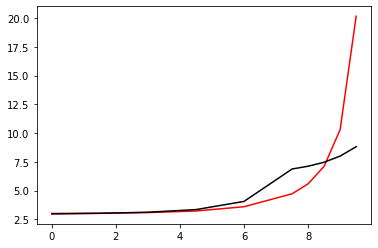

24000 0.06796716320160295
[3.05920755 3.00658021 2.99943166 3.13405999 3.73120635 6.40207327
 6.62593479 6.95371913 7.48812686 8.36355298]


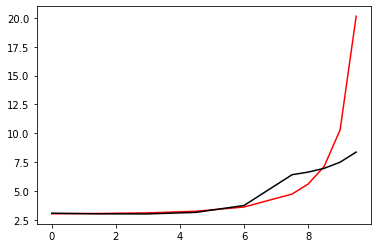

25000 0.4968266565517644
[3.05722042 3.09950186 3.20033391 3.45528943 4.24067029 7.42642584
 7.70330041 8.07249801 8.6108458  9.2397836 ]


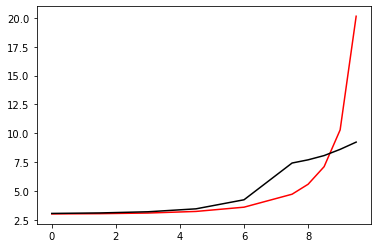

26000 0.6218181704758453
[3.19183879 3.17665604 3.2126258  3.39802686 4.05890857 6.77814532
 6.72059215 6.94973436 7.46187838 8.75100725]


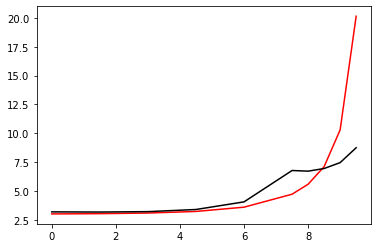

27000 0.06458924513016356
[3.00621301 3.00882232 3.05361561 3.2550396  3.97293786 6.98033962
 7.25791205 7.65897482 8.23117143 9.08603326]


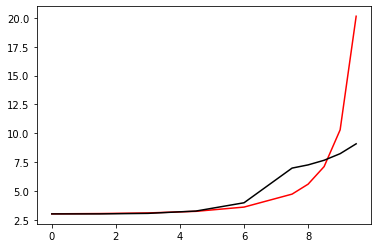

28000 0.06698229473372774
[3.00557156 3.00859438 3.05714757 3.25379285 3.92555436 6.61671433
 6.87914343 7.26454113 7.83671977 8.69993326]


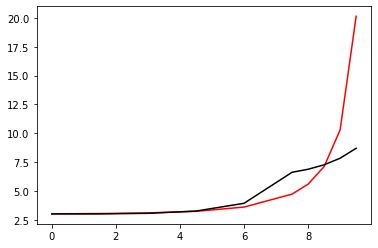

29000 0.06672013070657584
[2.99918039 3.00919893 3.06516917 3.26704149 3.94440522 6.68357855
 6.93534775 7.30150964 7.85559708 8.7004286 ]


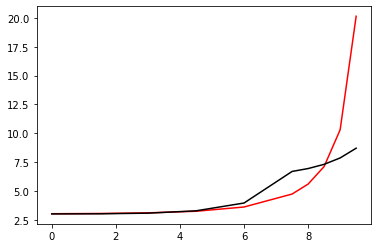

30000 0.0670431943032116
[2.9967376  3.01891441 3.07144034 3.25298754 3.90094825 6.68813664
 6.90601816 7.22106039 7.74141694 8.60287237]


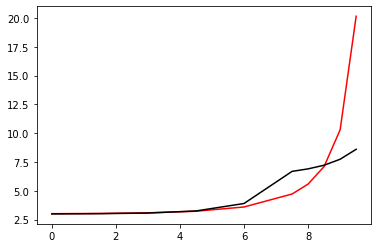

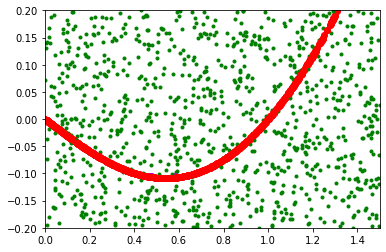

31000 0.6170604913730202
[3.06953676 3.11351811 3.22457154 3.50582627 4.33800756 7.62730263
 7.90983437 8.29475081 8.84363424 9.42489773]


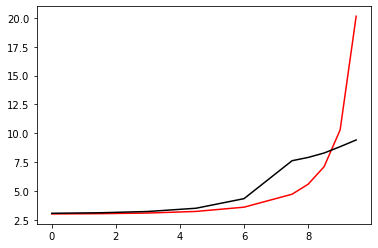

32000 0.06754599690500221
[3.03053652 3.00657188 3.02315809 3.18040349 3.81618678 6.56140286
 6.78857426 7.11187976 7.62717153 8.50654838]


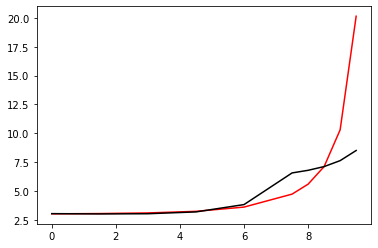

33000 0.6137383965074943
[2.79918892 2.75849992 2.75375847 2.91829517 3.67165854 7.01368712
 7.31641947 7.72979888 8.31539051 9.53204204]


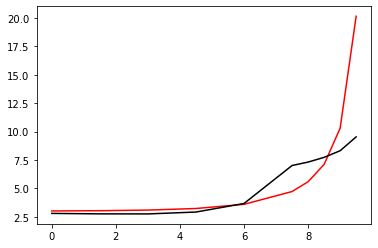

34000 0.0664623763259064
[2.96608533 3.00434357 3.07041193 3.27416635 3.99246736 6.85962478
 7.09504621 7.43161979 7.96089036 8.8075153 ]


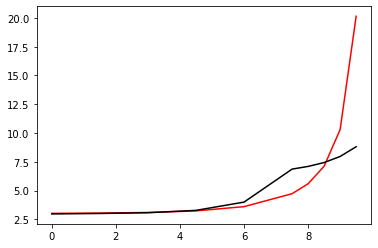

35000 0.06727928415808684
[2.98340794 2.99172274 3.06431964 3.28400598 3.96462942 6.63030624
 6.81956413 7.0996766  7.5966812  8.47215119]


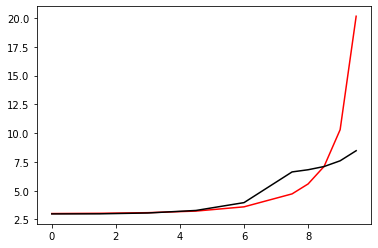

36000 0.06751573275526392
[2.99638595 2.94805652 2.96346814 3.1328848  3.76370417 6.44872009
 6.5770647  6.84898448 7.37953368 8.27638467]


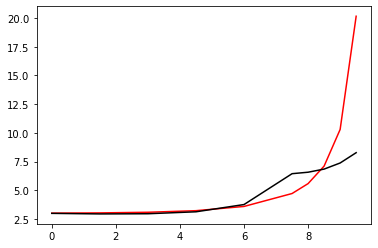

37000 0.05957634456317204
[2.99079565 3.02440624 3.11176348 3.35271481 4.115138   7.19424973
 7.44345776 7.78582791 8.30093596 9.09193941]


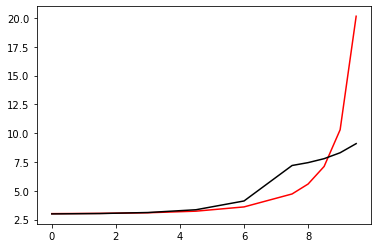

38000 0.06343067388231687
[2.99117982 3.01762955 3.08594108 3.30145802 4.03265763 7.01113101
 7.23716666 7.54284981 8.02987718 8.85691248]


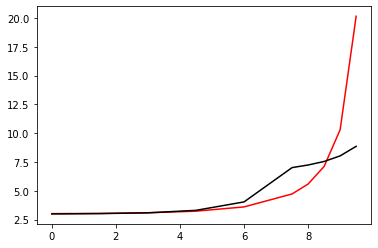

39000 0.06525238608673997
[2.9402656  3.00928414 3.13268299 3.38749711 4.09444557 6.7767506
 7.00016982 7.31831663 7.82654546 8.66998701]


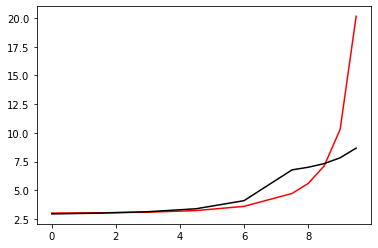

40000 0.06602471332063543
[2.99521413 3.01160086 3.11176176 3.37294894 4.08249643 6.72026565
 6.89562357 7.176095   7.67625805 8.51223492]


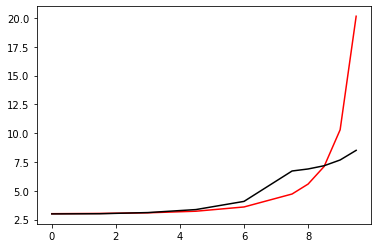

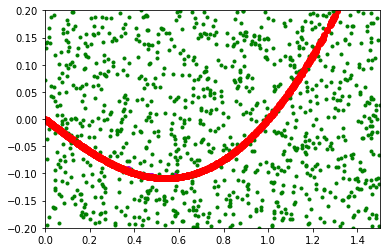

41000 0.0637712261572207
[3.01577116 2.99824944 3.04839574 3.27714776 4.02609734 7.00074621
 7.25692111 7.6284163  8.19051573 9.00763188]


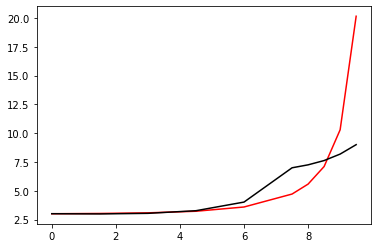

42000 0.06722788719352694
[2.99726617 2.98327231 3.02903605 3.22768288 3.91229756 6.7495927
 6.94618993 7.2271869  7.70909787 8.58576155]


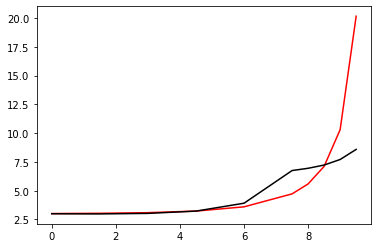

43000 0.06618006644933673
[2.97742507 2.99207649 3.0779432  3.32437075 4.07057475 6.79732345
 7.00290477 7.29473017 7.78908632 8.64514216]


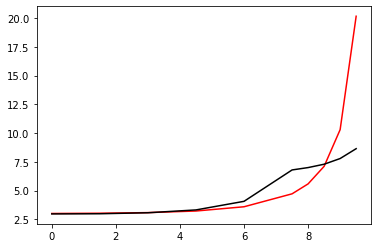

44000 0.06664452110972069
[2.92642345 2.9857585  3.11220157 3.38852543 4.1292943  6.75766903
 6.94997305 7.21824188 7.68422758 8.54743011]


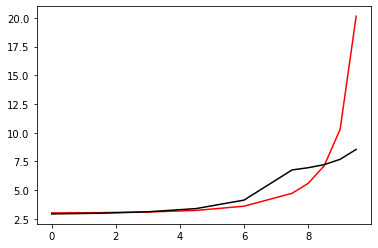

45000 0.06686592456110099
[2.96691367 2.99436338 3.08917969 3.3408918  4.04536806 6.61606518
 6.84098491 7.16294767 7.68987215 8.54864628]


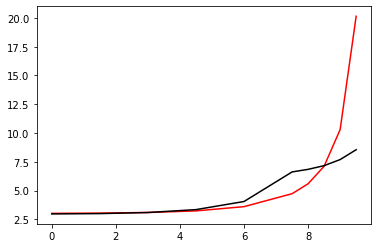

46000 0.06821302452953522
[2.97506596 3.00755716 3.08647832 3.30085699 3.92763606 6.22292676
 6.40545496 6.68922163 7.20164525 8.09754426]


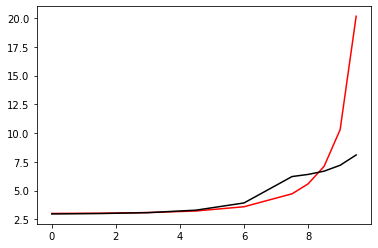

47000 0.06784154801008936
[3.01605983 2.99327136 3.02851042 3.20843591 3.82641467 6.43577831
 6.57399898 6.85442699 7.37102599 8.25824868]


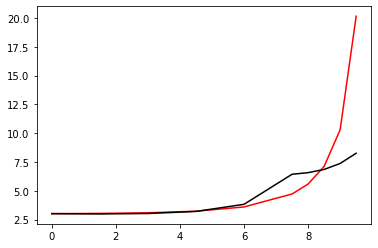

48000 0.06691836126200153
[2.98941002 3.0142319  3.07283811 3.26595275 3.93495771 6.72301405
 6.93790245 7.23627615 7.7273221  8.5852256 ]


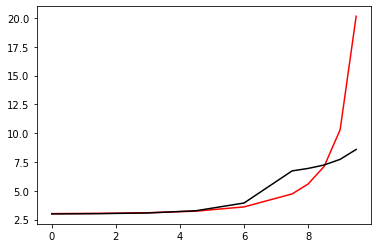

49000 0.06662220612550634
[2.99167267 2.99182185 3.0233691  3.19975705 3.90569909 7.04054142
 7.2857092  7.63415042 8.17572484 9.00054004]


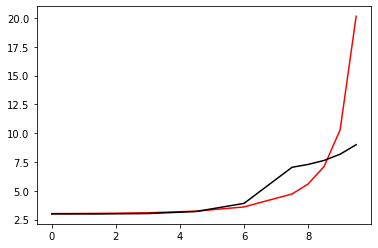

50000 0.06384042836403692
[2.96626013 2.99856676 3.08639872 3.32123615 4.05821403 7.04030527
 7.31388527 7.69996066 8.25804366 9.09110475]


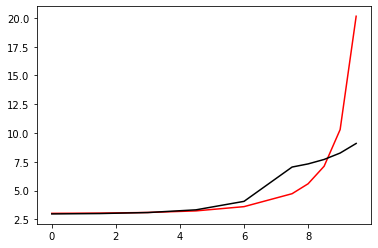

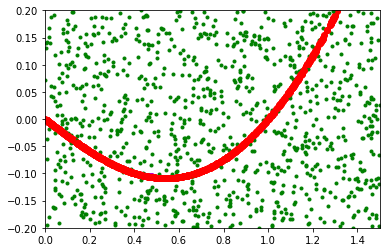

51000 0.06003789842373957
[2.94227886 2.99442547 3.12087565 3.40566713 4.18795362 7.16377022
 7.42407387 7.79482695 8.34104982 9.16537693]


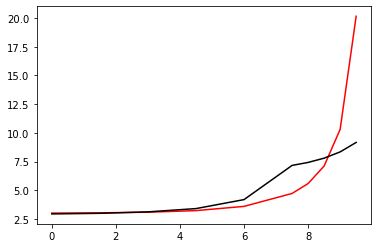

52000 0.06680241189267917
[2.93853944 3.00031463 3.13069143 3.40050897 4.09482994 6.5268509
 6.75530895 7.09964955 7.64382963 8.52927306]


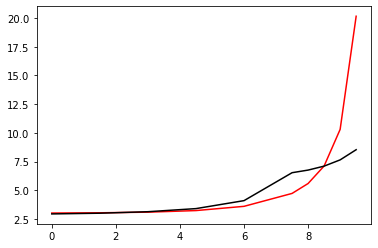

KeyboardInterrupt: 

In [30]:
c_reg1=0.01
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h])
    for i in range (100):
        optimizer.apply_gradients(zip(gradients, [h]))
    if j%100==0: 
        print(j*10, Error_func(h, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy()), print(h.numpy())
        plt.plot(x, h_real, 'r-'), plt.plot(x, h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'co')
            plt.plot(x_data1[i], y_data1[i], 'ro')
            plt.plot(x_data3[i], y_data3[i], 'mo')
        plt.xlim(0.0, 1.5)
        plt.ylim(-0.2, 0.2)
        plt.show()

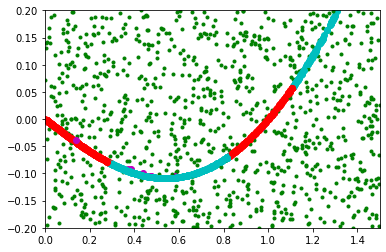

In [28]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()